In [138]:
import pickle
import numpy as np
from scipy.stats import pearsonr

def plot_market_data(run_num):
    import json
    import matplotlib.pyplot as plt

    run_data_folder = "run-" + str(run_num) + "/"
    bot_history_file = run_data_folder + "bot-1-history.json"

    with open(bot_history_file) as f:
        bot_history = json.load(f)

    # Extract market data
    market_prices = []
    market_volumes = []
    buy_back_price = bot_history[0]['market_state']["buy_back"]

    for entry in bot_history:
        market_prices.append(entry['market_state']["market_price"])
        market_volumes.append(entry['market_state']["volume"])

    # Drop the practice rounds
    market_prices = market_prices[3:]
    market_volumes = market_volumes[3:]

    mean_human_prices = np.zeros(len(market_prices))

    # Unpickle mean human price data
    with open("mean_human_prices.pkl", "rb") as f:
        mean_human_prices = pickle.load(f)

    # Create a figure with secondary y-axis
    fig, ax1 = plt.subplots()

    # Plot market volumes as bars
    ax1.bar(range(len(market_volumes)), market_volumes, color='tab:blue', alpha=0.7, label='Volume')
    ax1.set_xlabel('Market Round')
    ax1.set_ylabel('Volume', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_ylim(0, max(market_volumes) + 2)  # Adjust the y-axis limits as necessary

    # Create a secondary y-axis for market prices
    ax2 = ax1.twinx()
    ax2.plot(range(len(market_prices)), market_prices, color='tab:red', label='Price', linewidth=2)
    print(len(market_prices))
    ax2.axhline(y=buy_back_price, color='black', linestyle='--', linewidth=1.5, label='Buy Back Price')
    # Make dotted red line for mean human price
    ax2.plot(range(len(mean_human_prices)), mean_human_prices, color='tab:green', linestyle=':', label='Mean Human Price')
    ax2.set_ylabel('Price', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    #ax2.set_ylim(0, max(market_prices) + 2)  # Adjust the y-axis limits as necessary
    ax2.set_ylim(0, 50)  # Adjust the y-axis limits as necessary

    # Add a title
    plt.title('Market Prices and Traded Volumes')

    # Display the plot
    plt.tight_layout()
    plt.show()

def plot_multiple_runs(run_nums, title="No Title Provided"):
    import json
    import matplotlib.pyplot as plt

    num_runs = len(run_nums)
    fig, axes = plt.subplots(nrows=1, ncols=num_runs, figsize=(5*num_runs, 5), sharey=True)
    fig.suptitle(title, fontsize=16)

    for i, run_num in enumerate(run_nums):
        run_data_folder = "run-" + str(run_num) + "/"
        bot_history_file = run_data_folder + "bot-9-history.json"

        with open(bot_history_file) as f:
            bot_history = json.load(f)

        # Extract market data
        market_prices = []
        market_volumes = []
        buy_back_price = bot_history[0]['market_state']["buy_back"]

        for entry in bot_history:
            market_prices.append(entry['market_state']["market_price"])
            market_volumes.append(entry['market_state']["volume"])

        # Drop the practice rounds
        market_prices = market_prices[3:]
        market_volumes = market_volumes[3:]

        ax1 = axes[i] if num_runs > 1 else axes

        # Plot market volumes as bars
        ax1.bar(range(len(market_volumes)), market_volumes, color='tab:blue', alpha=0.7, label='Volume')
        ax1.set_xlabel('Market Round')
        ax1.set_ylabel('Volume', color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')
        ax1.set_ylim(0, max(market_volumes) + 2)  # Adjust the y-axis limits as necessary

        # Create a secondary y-axis for market prices
        ax2 = ax1.twinx()
        ax2.plot(range(len(market_prices)), market_prices, color='tab:red', label='Price', linewidth=2)
        ax2.axhline(y=buy_back_price, color='black', linestyle='--', linewidth=1.5, label='Buy Back Price')
        ax2.set_ylabel('Price', color='tab:red')
        ax2.tick_params(axis='y', labelcolor='tab:red')
        ax2.set_ylim(0, max(market_prices) + 2)  # Adjust the y-axis limits as necessary

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

import matplotlib.pyplot as plt
import numpy as np
import json
import pickle

def plot_multiple_runs_overlaid(run_nums, title="Market Price Dynamics in LLM-Driven Markets", show_human_mean=True):
    fig, ax1 = plt.subplots(figsize=(8, 5), dpi=300)  # Increased DPI for publication quality
    
    llm_market_color = "#E87722"  # Caltech Orange for LLM market price lines
    human_mean_color = "#003C71"  # Deep Blue for human mean price
    buy_back_color = "black"  # Black for buy back price reference
    
    line_styles = ['-', '--', '-.', ':']  # Different line styles for LLM runs
    
    for i, run_num in enumerate(run_nums):
        run_data_folder = f"run-{run_num}/"
        bot_history_file = run_data_folder + "bot-9-history.json"
        
        with open(bot_history_file) as f:
            bot_history = json.load(f)
        
        market_prices = []
        market_volumes = []
        buy_back_price = bot_history[0]['market_state']["buy_back"]
        
        for entry in bot_history:
            market_prices.append(entry['market_state']["market_price"])
            market_volumes.append(entry['market_state']["volume"])

        # Drop the practice rounds
        market_prices = market_prices[3:]
        market_volumes = market_volumes[3:]

        # Load mean human price data
        with open("mean_human_prices.pkl", "rb") as f:
            mean_human_prices = pickle.load(f)
        
        # Plot market prices with different line styles
        round_nums = np.arange(1, len(market_prices) + 1)
        ax1.plot(round_nums, market_prices, linewidth=2.5, linestyle=line_styles[i % len(line_styles)], color=llm_market_color, alpha=0.85)
    
    # Plot buy-back price
    ax1.axhline(y=buy_back_price, color=buy_back_color, linestyle='--', linewidth=2, label='Fundamental Value ($14)')

    # Plot mean human price once (single legend entry)
    if show_human_mean:
        ax1.plot(range(len(mean_human_prices)), mean_human_prices, color=human_mean_color, linestyle='-', linewidth=3, label='Avg. Human Market Price')
    
    # Labels and formatting
    ax1.set_xlabel('Market Round', fontsize=16, labelpad=12)  # Bigger font size
    ax1.set_ylabel('Price', fontsize=16, labelpad=12)  # Bigger font size and padding
    
    # Adjust tick label sizes
    ax1.tick_params(axis='both', labelsize=14)  
    
    if show_human_mean:
        ax1.set_ylim(0, 50)
    else:
        ax1.set_ylim(0, max(max(market_prices) + 2, 25))
    ax1.set_xlim(1, len(market_prices))
    
    # Custom legend handling
    handles, labels = ax1.get_legend_handles_labels()
    handles.append(plt.Line2D([0], [0], color=llm_market_color, linestyle='-', linewidth=2.5))
    labels.append("LLM-only Market Price")
    ax1.legend(handles, labels, fontsize=14, loc='lower left', frameon=False)  # Bigger font size
    
    # Title formatting
    fig.suptitle(title, fontsize=18, fontweight='bold')  # Increased font size
    
    # Improved grid and minor ticks for readability
    ax1.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
    ax1.minorticks_on()
    
    plt.show()

def plot_multiple_runs_averaged(run_nums, title="Market Price Dynamics in LLM-Driven Markets", show_human_mean=True):
    fig, ax1 = plt.subplots(figsize=(8, 5), dpi=300)  # Increased DPI for publication quality
    
    llm_market_color = "#E87722"  # Caltech Orange for LLM market price lines
    human_mean_color = "#003C71"  # Deep Blue for human mean price
    buy_back_color = "black"  # Black for buy back price reference
    
    line_styles = ['-', '--', '-.', ':']  # Different line styles for LLM runs

    average_market_prices = []
    
    for i, run_num in enumerate(run_nums):
        run_data_folder = f"run-{run_num}/"
        bot_history_file = run_data_folder + "bot-9-history.json"
        
        with open(bot_history_file) as f:
            bot_history = json.load(f)
        
        market_prices = []
        market_volumes = []
        buy_back_price = bot_history[0]['market_state']["buy_back"]
        
        for entry in bot_history:
            market_prices.append(entry['market_state']["market_price"])
            market_volumes.append(entry['market_state']["volume"])

        # Drop the practice rounds
        market_prices = market_prices[3:]
        market_volumes = market_volumes[3:]

        # Load mean human price data
        with open("mean_human_prices.pkl", "rb") as f:
            mean_human_prices = pickle.load(f)

        # Accumulate market prices for averaging
        if i == 0:
            average_market_prices = np.array(market_prices)
        else:
            average_market_prices += np.array(market_prices)
    
    # Plot buy-back price
    ax1.axhline(y=buy_back_price, color=buy_back_color, linestyle='--', linewidth=1.5, label='Fundamental Value ($14)')

    # Plot market prices with different line styles
    # Average the market prices
    average_market_prices /= 3
    round_nums = np.arange(1, len(average_market_prices) + 1)
    ax1.plot(round_nums, average_market_prices, linewidth=2.0, color=llm_market_color, alpha=0.85)

    # Plot mean human price once (single legend entry)
    if show_human_mean:
        ax1.plot(range(len(mean_human_prices)), mean_human_prices, color=human_mean_color, linestyle='-', linewidth=2.5, label='Avg. Human Market Price')
    
    
    # Labels and formatting
    ax1.set_xlabel('Market Round', fontsize=12)
    ax1.set_ylabel('Price', fontsize=12, labelpad=10)  # Added padding for better readability
    if show_human_mean:
        ax1.set_ylim(0, 50)
    else:
        ax1.set_ylim(0, max(max(market_prices) + 2, 25))
    ax1.set_xlim(1, len(market_prices))
    
    # Custom legend handling
    handles, labels = ax1.get_legend_handles_labels()
    handles.append(plt.Line2D([0], [0], color=llm_market_color, linestyle='-', linewidth=2.0))
    labels.append("LLM-only Market Price")
    ax1.legend(handles, labels, fontsize=16, loc='lower left', frameon=False)  # Removed legend box outline
    
    # Title formatting
    fig.suptitle(title, fontsize=14, fontweight='bold')
    
    # Improved grid and minor ticks for readability
    ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    ax1.minorticks_on()
    
    plt.show()

def plot_multiple_runs_averaged_overlaid(model_runs, title="Market Price Dynamics in LLM-Driven Markets", show_human_mean=True):
    fig, ax1 = plt.subplots(figsize=(8, 5), dpi=300)  # Increased DPI for publication quality
    
    llm_market_color = "#E87722"  # Caltech Orange for LLM market price lines
    human_mean_color = "#003C71"  # Deep Blue for human mean price
    buy_back_color = "black"  # Black for buy back price reference
    
    line_styles = ['-', '--', '-.', ':']  # Different line styles for LLM runs

    for model in model_runs.keys():
        run_nums = model_runs[model]
        model_label = model

        average_market_prices = []
        
        for i, run_num in enumerate(run_nums):
            run_data_folder = f"run-{run_num}/"
            bot_history_file = run_data_folder + "bot-9-history.json"
            
            with open(bot_history_file) as f:
                bot_history = json.load(f)
            
            market_prices = []
            market_volumes = []
            buy_back_price = bot_history[0]['market_state']["buy_back"]
            
            for entry in bot_history:
                market_prices.append(entry['market_state']["market_price"])
                market_volumes.append(entry['market_state']["volume"])

            # Drop the practice rounds
            market_prices = market_prices[3:]
            market_volumes = market_volumes[3:]

            # Load mean human price data
            with open("mean_human_prices.pkl", "rb") as f:
                mean_human_prices = pickle.load(f)

            # Accumulate market prices for averaging
            if i == 0:
                average_market_prices = np.array(market_prices)
            else:
                average_market_prices += np.array(market_prices)

        average_market_prices /= len(run_nums)
        round_nums = np.arange(1, len(average_market_prices) + 1)
        ax1.plot(round_nums, average_market_prices, linewidth=2.0, alpha=0.85, label=model_label)
    
    # Plot buy-back price
    ax1.axhline(y=buy_back_price, color=buy_back_color, linestyle='--', linewidth=1.5, label='Fundamental Value ($14)')

    # Plot mean human price once (single legend entry)
    if show_human_mean:
        ax1.plot(range(len(mean_human_prices)), mean_human_prices, color=human_mean_color, linestyle='-', linewidth=2.5, label='Avg. Human Market Price')
    
    
    # Labels and formatting
    ax1.set_xlabel('Market Round', fontsize=12)
    ax1.set_ylabel('Price', fontsize=12, labelpad=10)  # Added padding for better readability
    if show_human_mean:
        ax1.set_ylim(0, 50)
    else:
        ax1.set_ylim(0, max(max(market_prices) + 2, 25))
    ax1.set_xlim(1, len(market_prices))
    
    # Custom legend handling
    handles, labels = ax1.get_legend_handles_labels()
    handles.append(plt.Line2D([0], [0], color=llm_market_color, linestyle='-', linewidth=2.0))
    ax1.legend(handles, labels, frameon=False)  # Removed legend box outline
    
    # Title formatting
    fig.suptitle(title, fontsize=14, fontweight='bold')
    
    # Improved grid and minor ticks for readability
    ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    ax1.minorticks_on()
    
    plt.show()

def compute_mse_values(run_nums):
    # Fundamental price
    fundamental_price = 14
    
    mse_fundamental = []
    mse_human = []
    
    # Load mean human price data
    with open("mean_human_prices.pkl", "rb") as f:
        mean_human_prices = pickle.load(f)
    
    for i, run_num in enumerate(run_nums):
        run_data_folder = f"run-{run_num}/"
        bot_history_file = run_data_folder + "bot-9-history.json"
        
        with open(bot_history_file) as f:
            bot_history = json.load(f)
        
        market_prices = []
        
        for entry in bot_history:
            market_prices.append(entry['market_state']["market_price"])
        
        # Drop the practice rounds
        market_prices = market_prices[3:]
        
        # Compute MSE compared to fundamental price
        mse_fund = np.mean((np.array(market_prices) - fundamental_price) ** 2)
        mse_fundamental.append(mse_fund)
        
        # Compute MSE compared to mean human prices
        mse_hum = np.mean((np.array(market_prices) - np.array(mean_human_prices[:len(market_prices)])) ** 2)
        mse_human.append(mse_hum)
    # Also compute and print MSE for human mean price relative to fundamental price
    mse_human_fundamental = np.mean((np.array(mean_human_prices[:len(market_prices)]) - fundamental_price) ** 2)
    print(f"MSE of human mean price relative to fundamental price: {mse_human_fundamental:.2f}")
        
    return np.mean(mse_fundamental), np.mean(mse_human)

def compute_pearson_values(run_nums):
    # Fundamental price
    fundamental_price = 14
    
    pearson_fundamental = []
    pearson_human = []
    
    # Load mean human price data
    with open("mean_human_prices.pkl", "rb") as f:
        mean_human_prices = pickle.load(f)
    
    for i, run_num in enumerate(run_nums):
        run_data_folder = f"run-{run_num}/"
        bot_history_file = run_data_folder + "bot-9-history.json"
        
        with open(bot_history_file) as f:
            bot_history = json.load(f)
        
        market_prices = [entry['market_state']["market_price"] for entry in bot_history]
        
        # Drop the practice rounds
        market_prices = market_prices[3:]
        
        # Ensure length consistency with mean_human_prices
        min_length = min(len(market_prices), len(mean_human_prices))
        market_prices = market_prices[:min_length]
        mean_human_prices_trimmed = mean_human_prices[:min_length]

        
        # Compute Pearson correlation compared to mean human prices
        pearson_hum, _ = pearsonr(market_prices, mean_human_prices_trimmed)
        pearson_human.append(pearson_hum)
    
        
    return np.mean(pearson_human)

def calculate_port_val(run_num):
    run_folder = f"run-{run_num}/"
    compressed_rounds_file = run_folder + "all-rounds-compressed.json"
    with open(compressed_rounds_file) as f:
        loaded_data = json.load(f)
    # Get Round 30 data
    data = loaded_data['Round 30']
    port_val_list = []
    for i in range(len(data)):
        port_val = data[i]['portfolio_state']['current_cash'] + data[i]['portfolio_state']['num_shares']*14
        port_val_list.append(port_val)
    return port_val_list

mixed_bot_types_dict = {
    1: "gpt-3.5",
    2: "gpt-3.5",
    3: "gpt-3.5",
    4: "gpt-3.5",
    5: "gpt-4o",
    6: "gpt-4o",
    7: "gpt-4o",
    8: "gpt-4o",
    9: "gemini-1.5-pro",
    10: "gemini-1.5-pro",
    11: "gemini-1.5-pro",
    12: "gemini-1.5-pro",
    13: "grok-2",
    14: "grok-2",
    15: "grok-2",
    16: "grok-2",
    17: "mistral-large",
    18: "mistral-large",
    19: "mistral-large",
    20: "mistral-large",
    21: "claude-3.5-sonnet",
    22: "claude-3.5-sonnet",
    23: "claude-3.5-sonnet",
    24: "claude-3.5-sonnet"
}

def compute_agent_performance_mixed_markets(runs):
    model_ports = {
        "gpt-3.5": [],
        "gpt-4o": [],
        "gemini-1.5-pro": [],
        "grok-2": [],
        "mistral-large": [],
        "claude-3.5-sonnet": []
    }
    for run in runs:
        port_vals = calculate_port_val(run)
        for i in range(len(port_vals)):
            model_ports[mixed_bot_types_dict[i+1]].append(port_vals[i])

    # Compute and print mean and std for each model
    for model in model_ports:
        print(f"{model}: {np.mean(model_ports[model]):.2f} ± {np.std(model_ports[model]):.2f}")

In [128]:
compute_agent_performance_mixed_markets([22, 23, 24])

gpt-3.5: 674.42 ± 12.08
gpt-4o: 671.36 ± 17.30
gemini-1.5-pro: 688.49 ± 20.05
grok-2: 668.51 ± 27.01
mistral-large: 689.56 ± 16.91
claude-3.5-sonnet: 680.36 ± 25.83


30


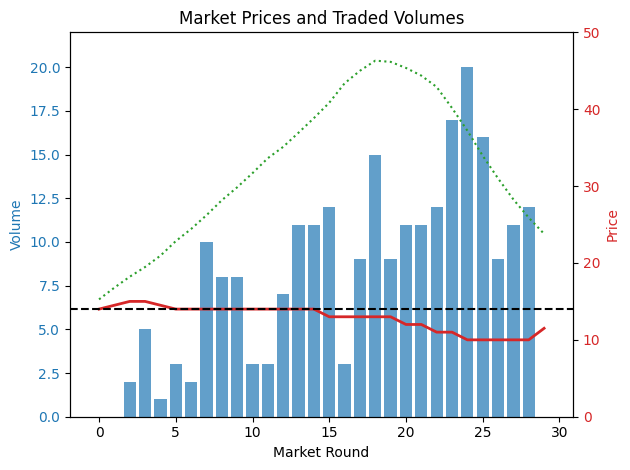

In [2]:
plot_market_data(5)

In [35]:
model_runs = {
    "GPT-3.5": [1, 2, 3],
    "Gemini 1.5 Pro": [5, 6, 7],
    "GPT-4o": [8, 9, 10],
    "Mistral Large 24.11": [11, 12, 13],
    "Claude Sonnet 3.5": [19, 20, 21],
    "Grok 2": [25, 26, 27],
    "Battle Royale": [22, 23, 24]
}

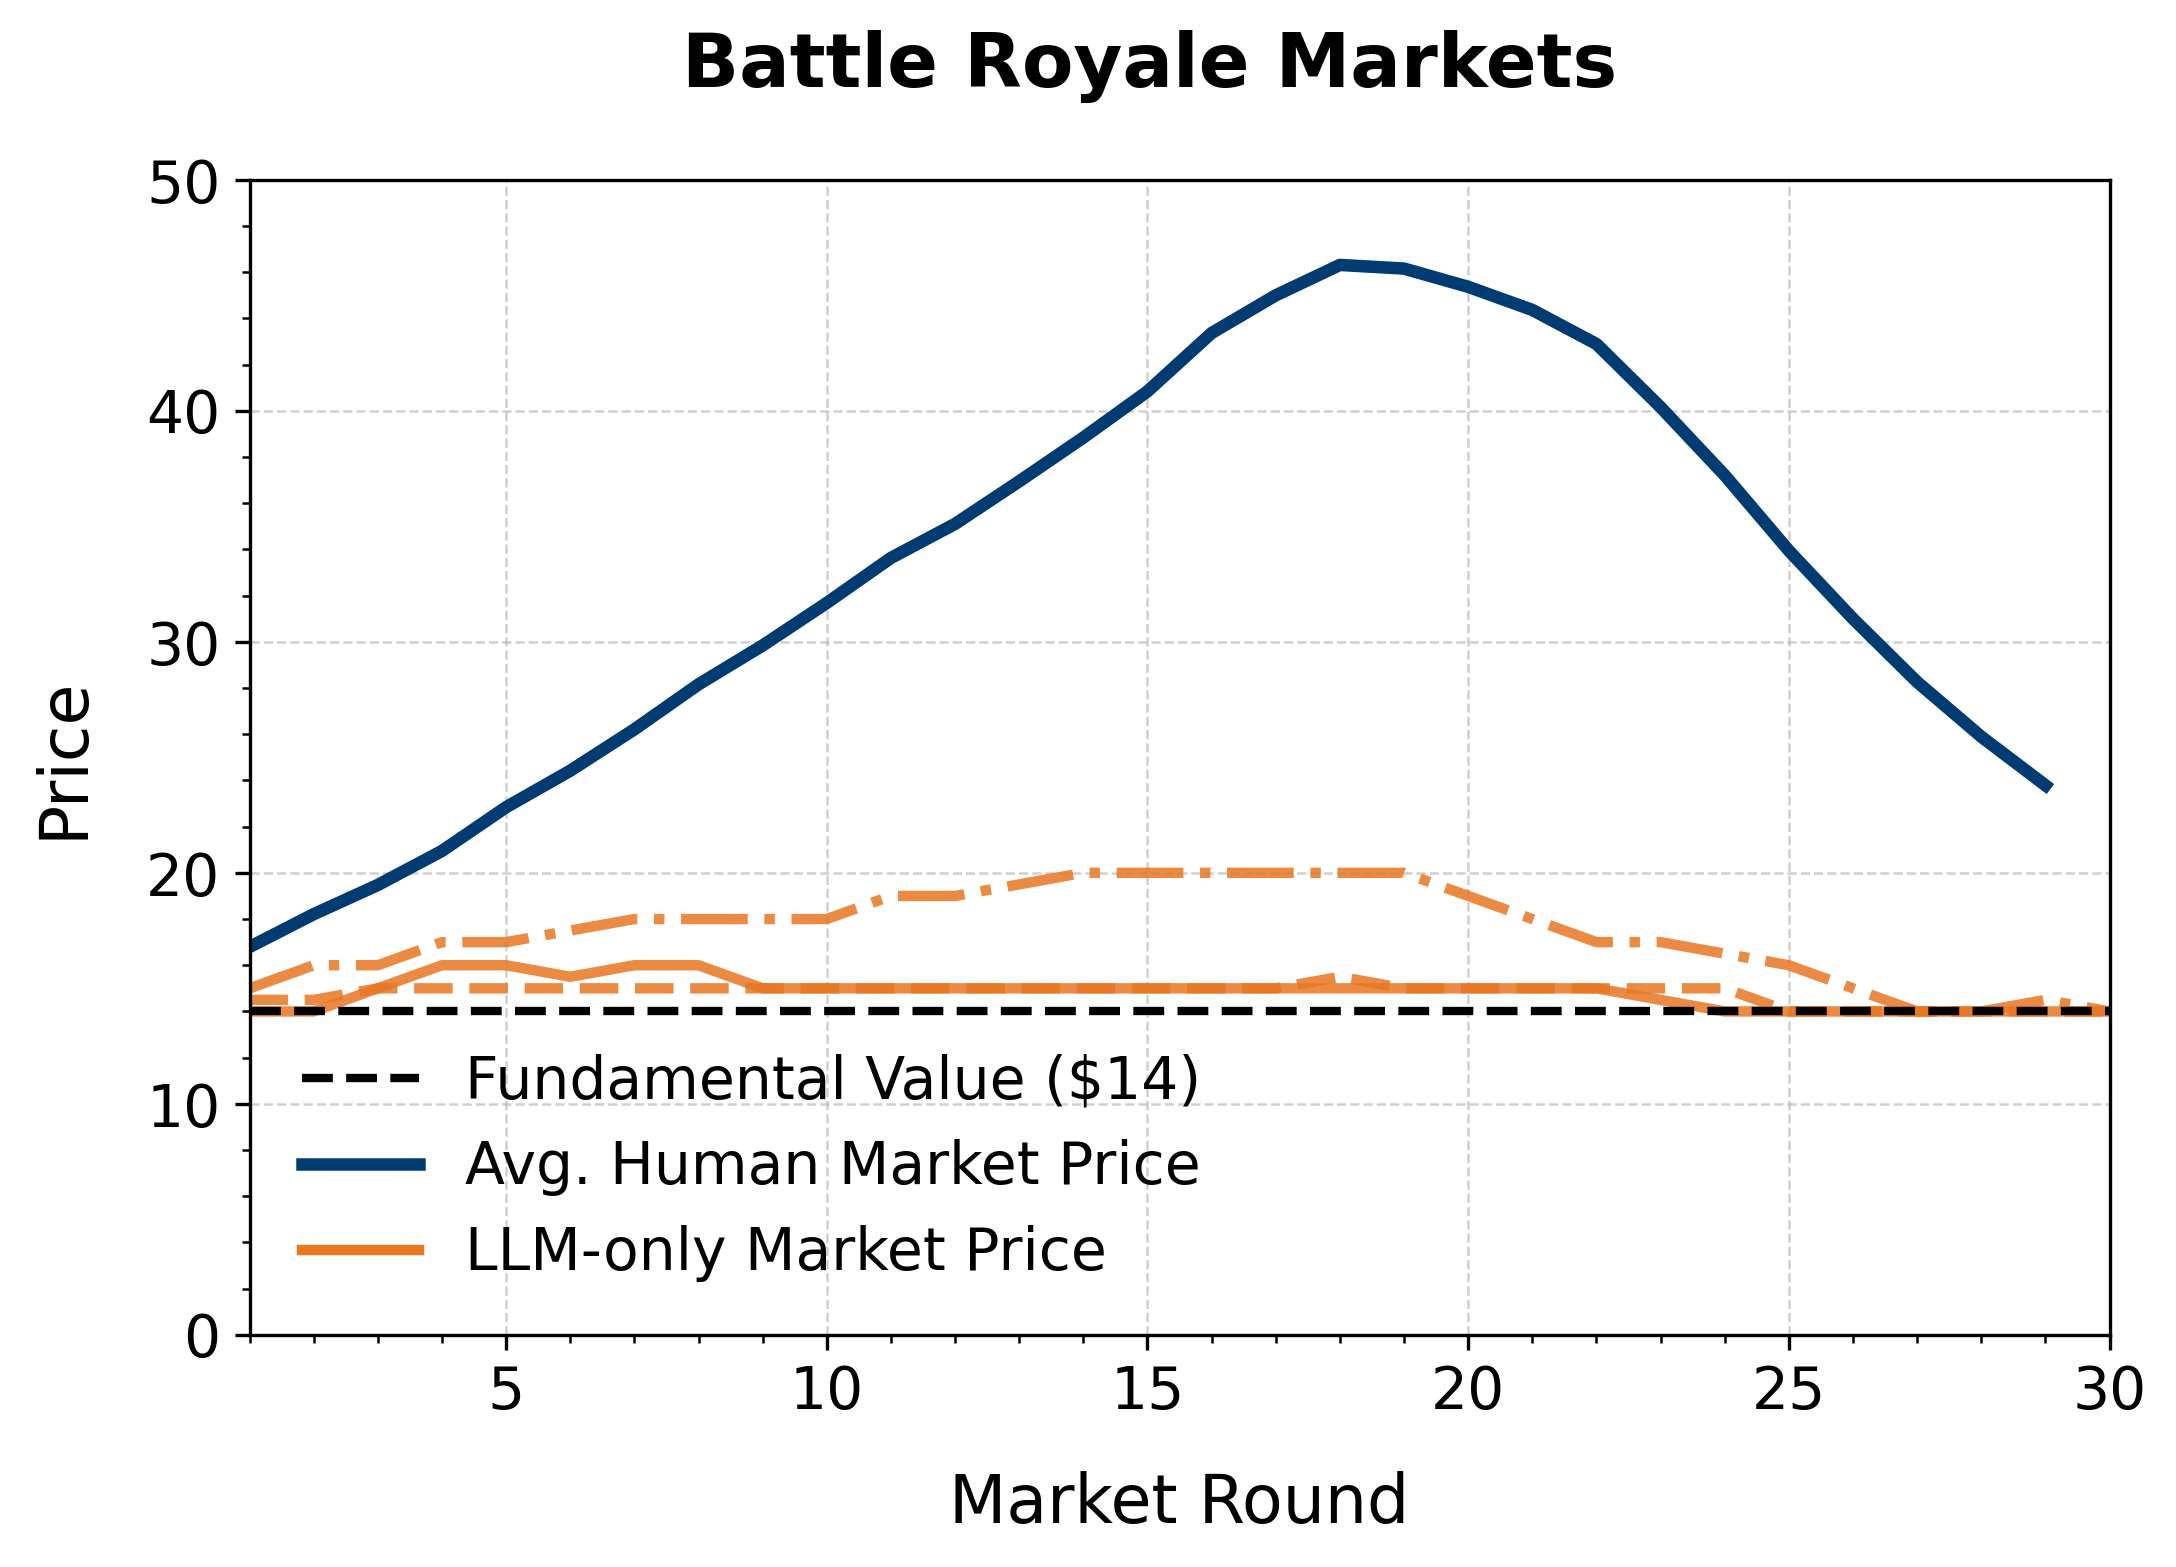

In [139]:
plot_multiple_runs_overlaid(model_runs["Battle Royale"], title="Battle Royale Markets", show_human_mean=True)

In [89]:
for model in model_runs.keys():
    print(f"Model: {model}")
    # Get portfolio values for all agents in all runs
    port_vals = []
    for run_num in model_runs[model]:
        new_port_vals = calculate_port_val(run_num)
        # Combine with previous runs
        port_vals = port_vals + new_port_vals
    
    # Compute the variance of the mean portfolio values
    print(np.std(port_vals))

Model: GPT-3.5
30.439582333972105
Model: Gemini 1.5 Pro
45.58243982396681
Model: GPT-4o
22.762561550346945
Model: Mistral Large 24.11
49.95788169270413
Model: Claude Sonnet 3.5
26.15153508347497
Model: Grok 2
39.431346333074764
Model: Battle Royale
21.22609624115769


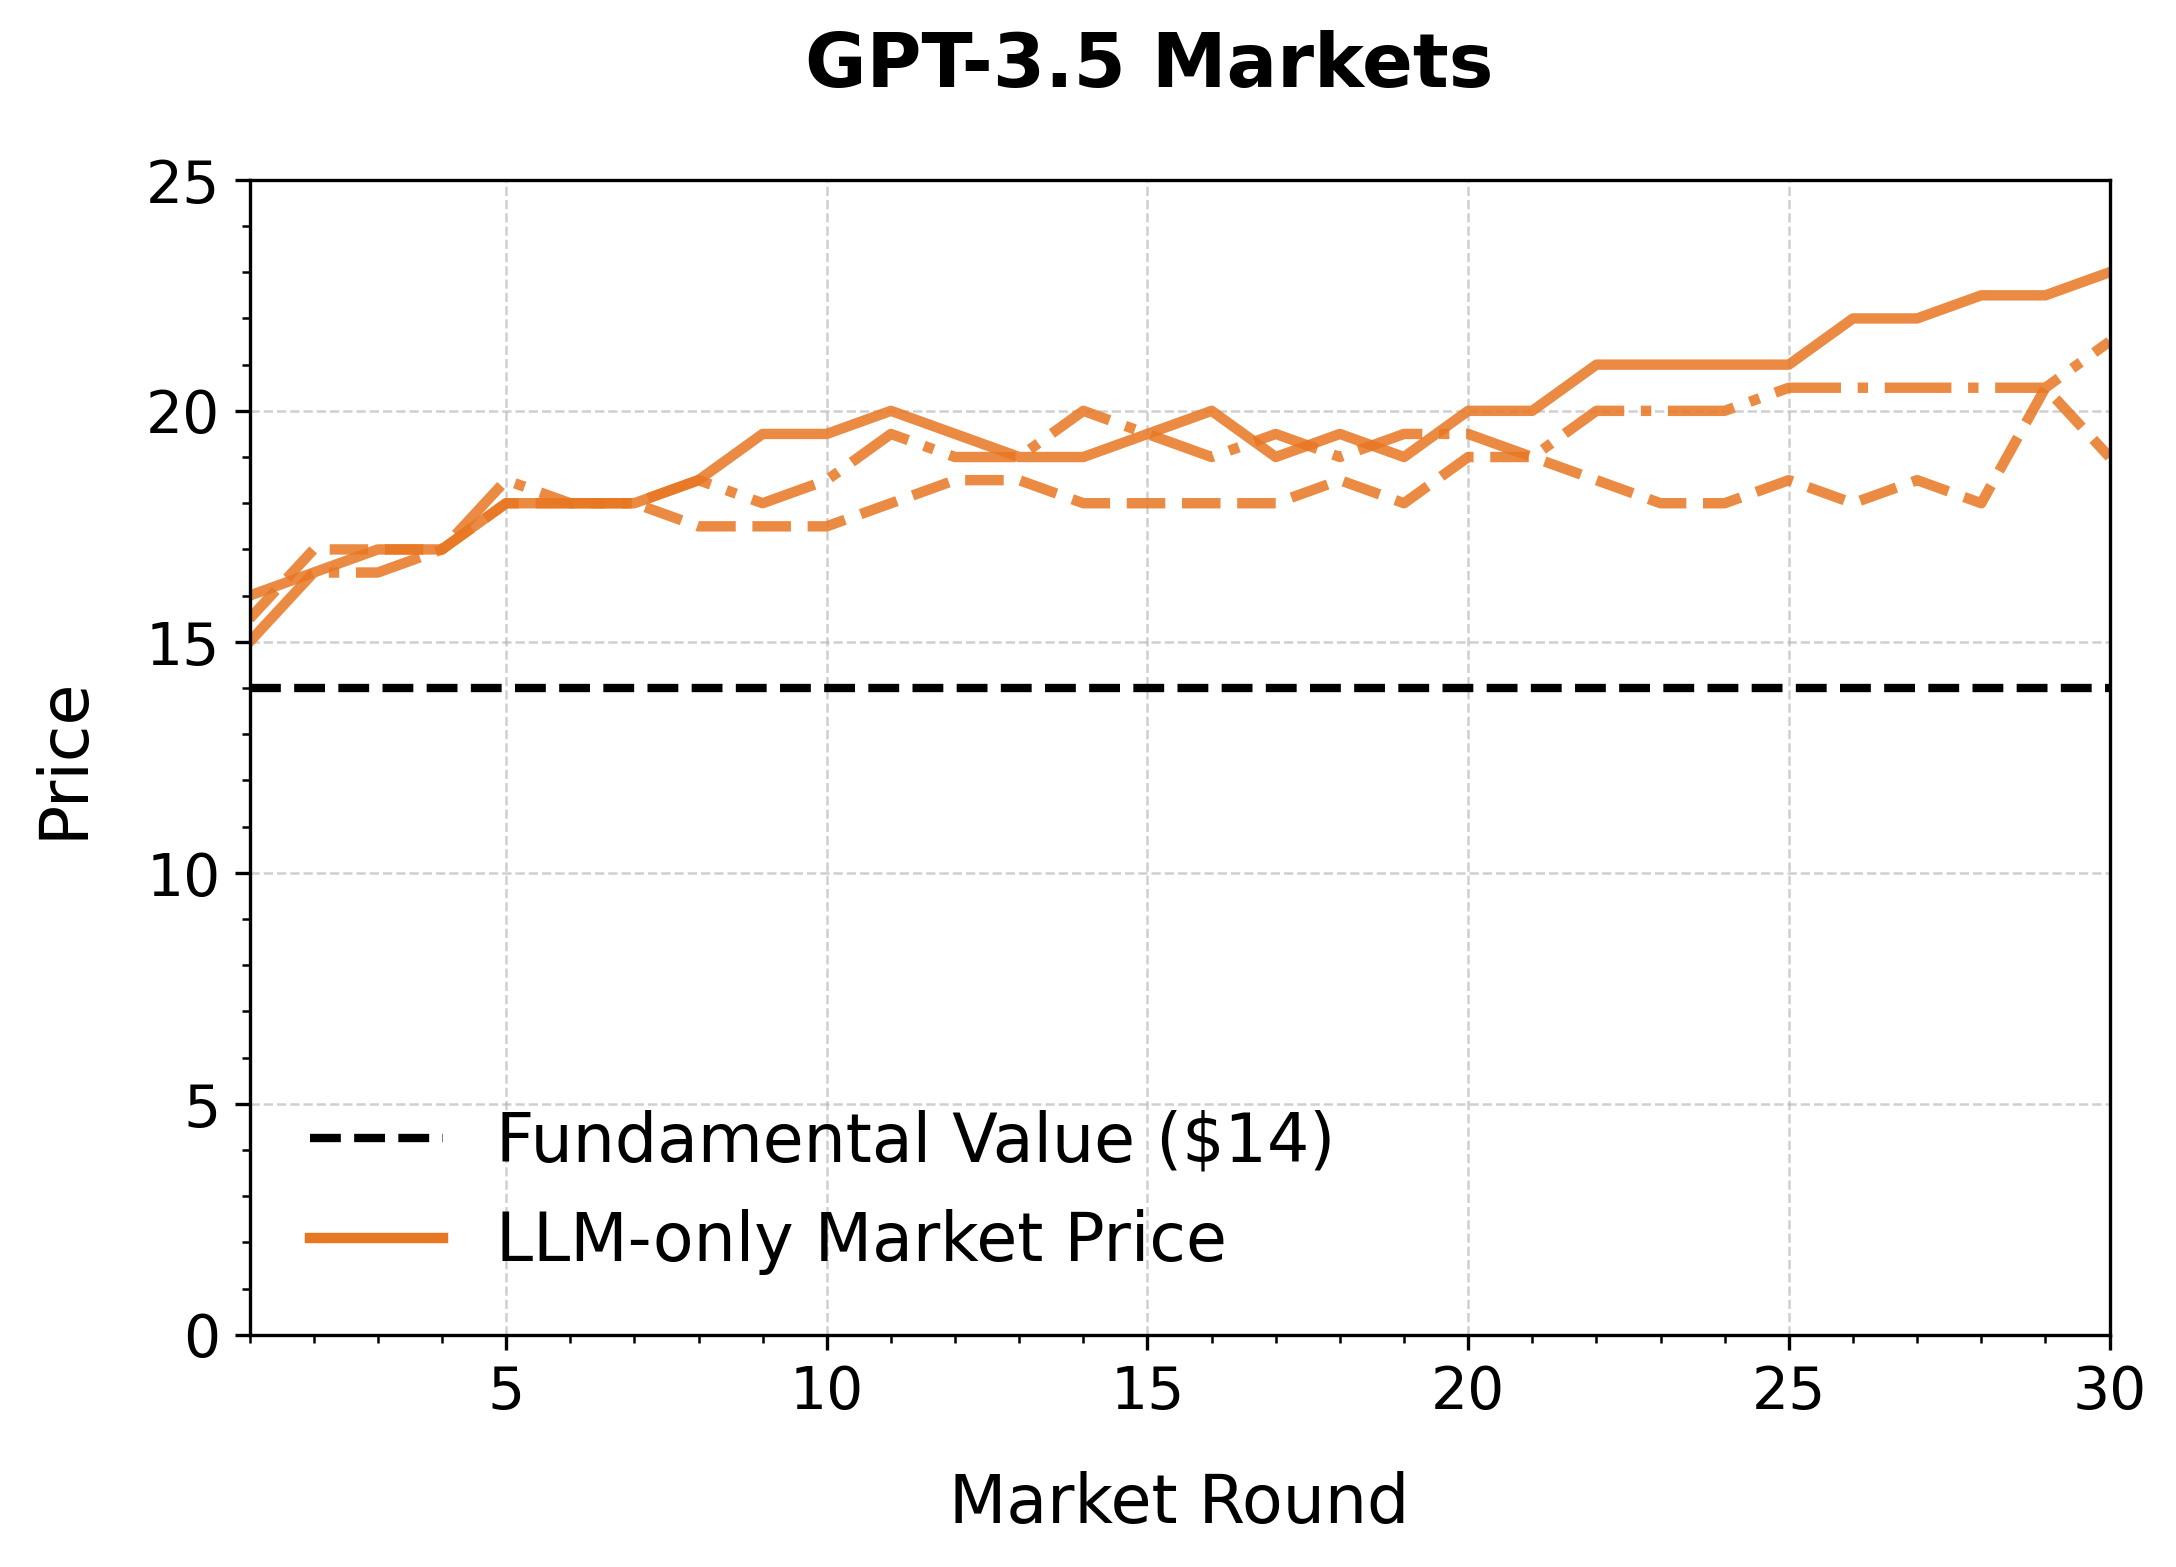

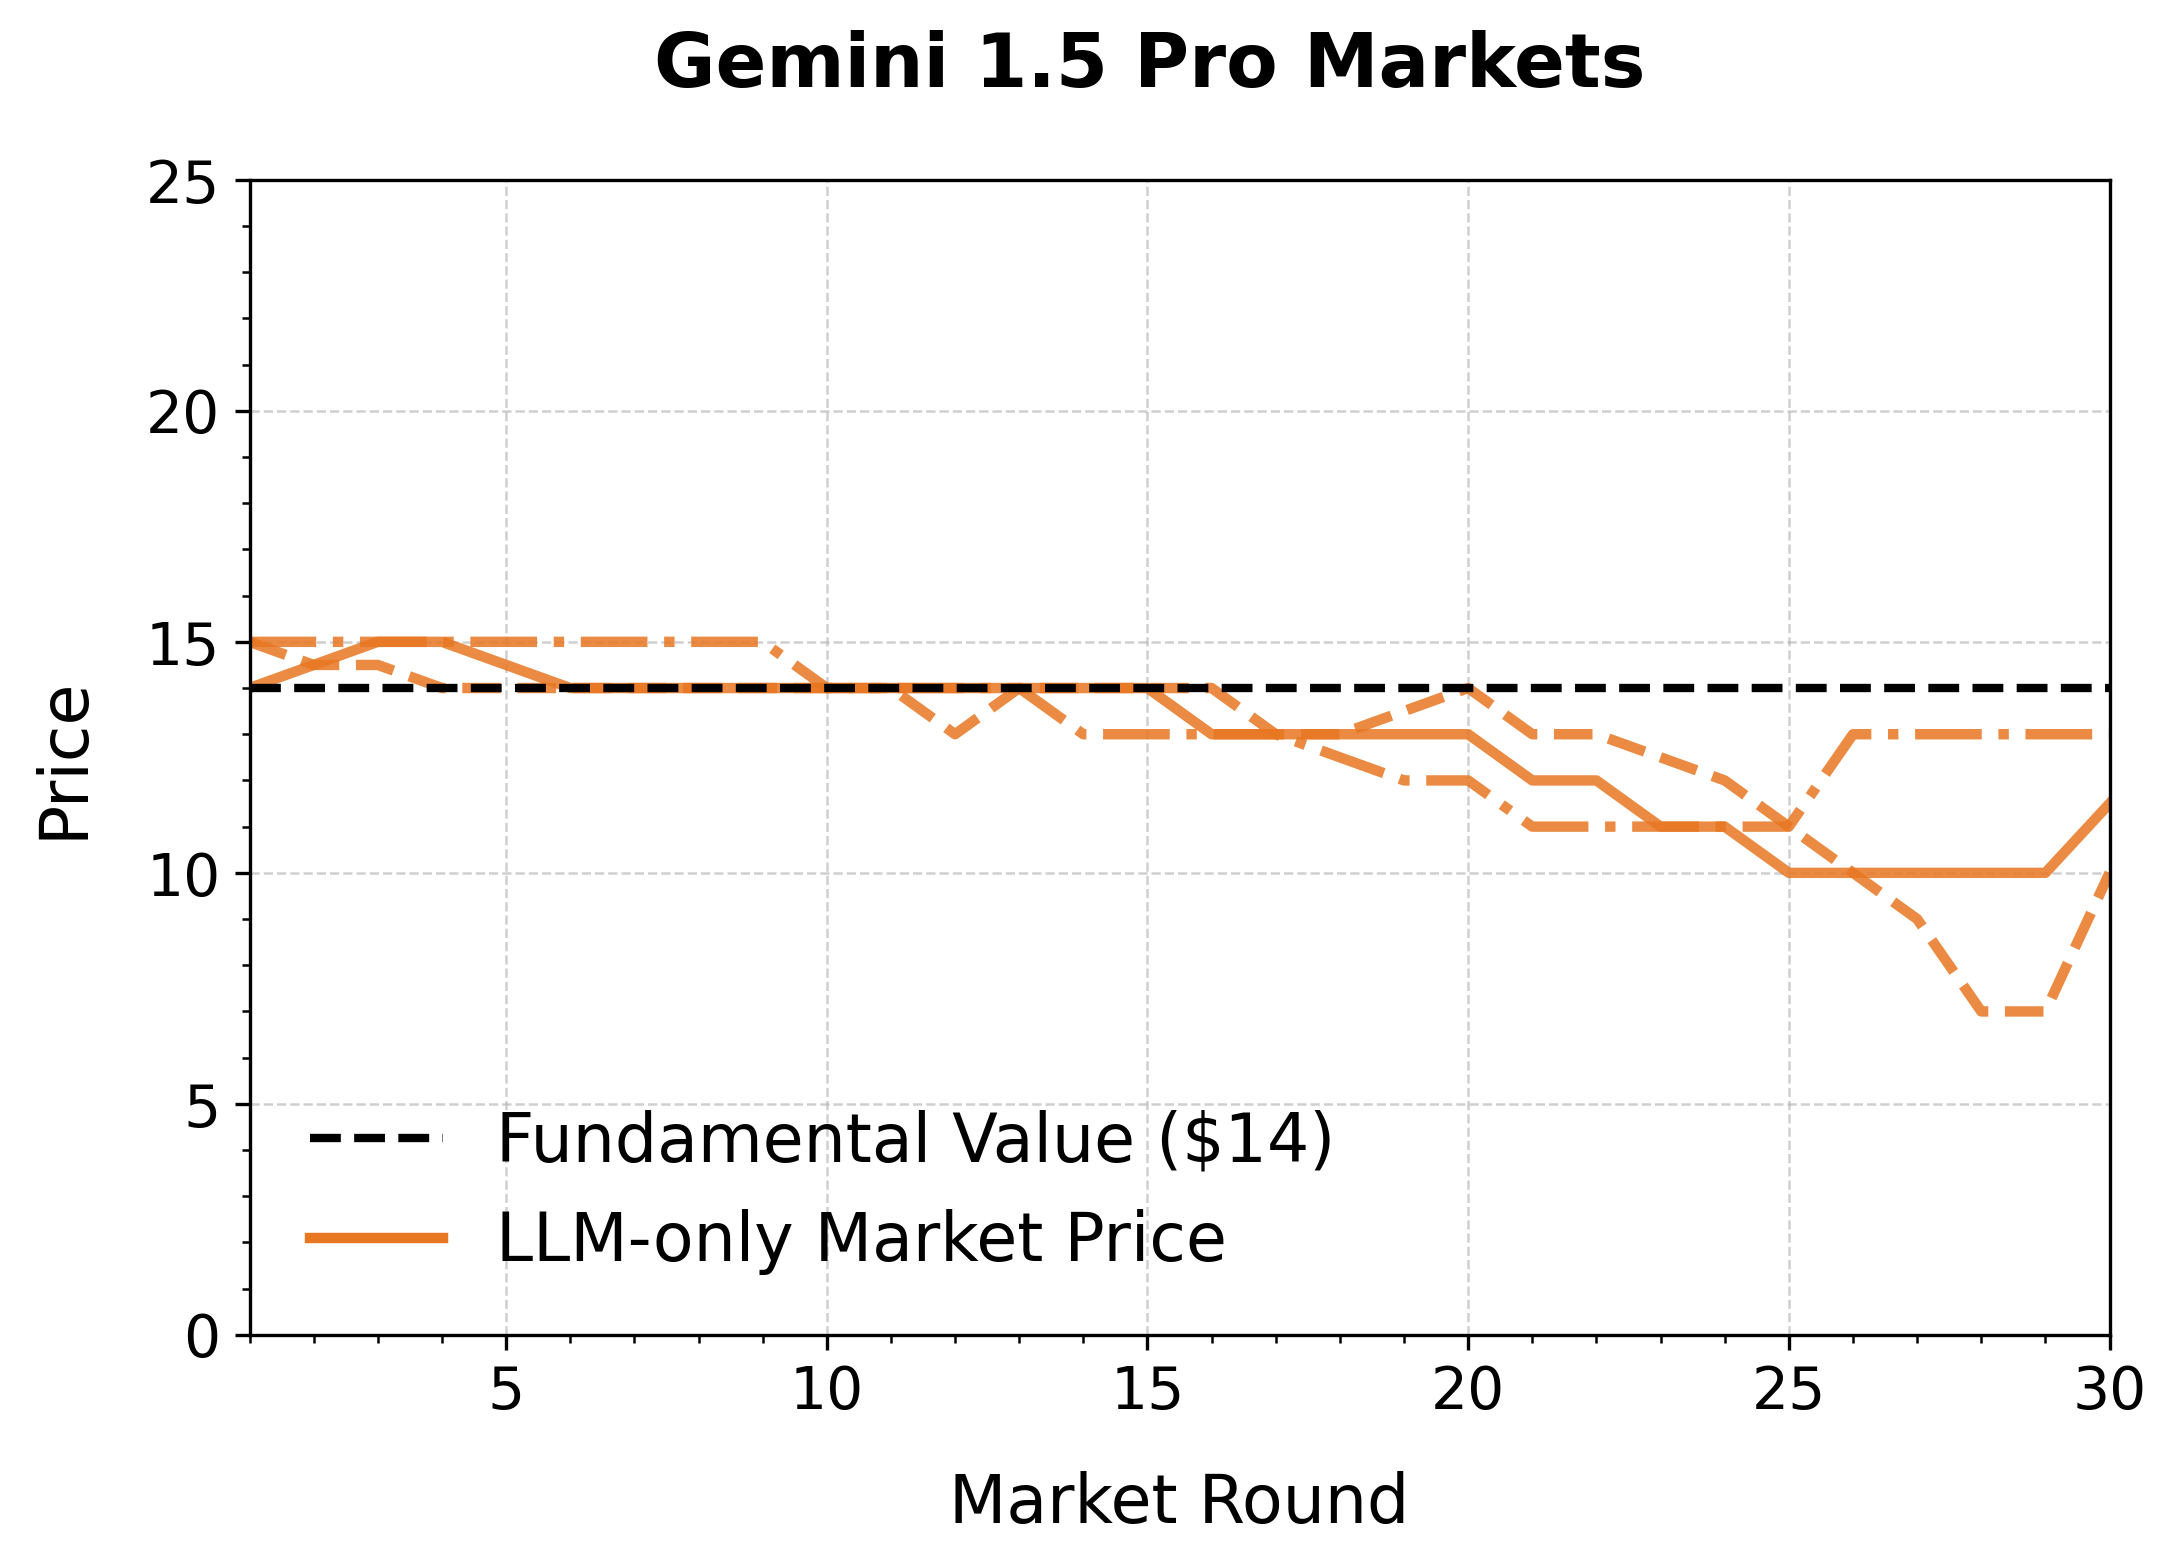

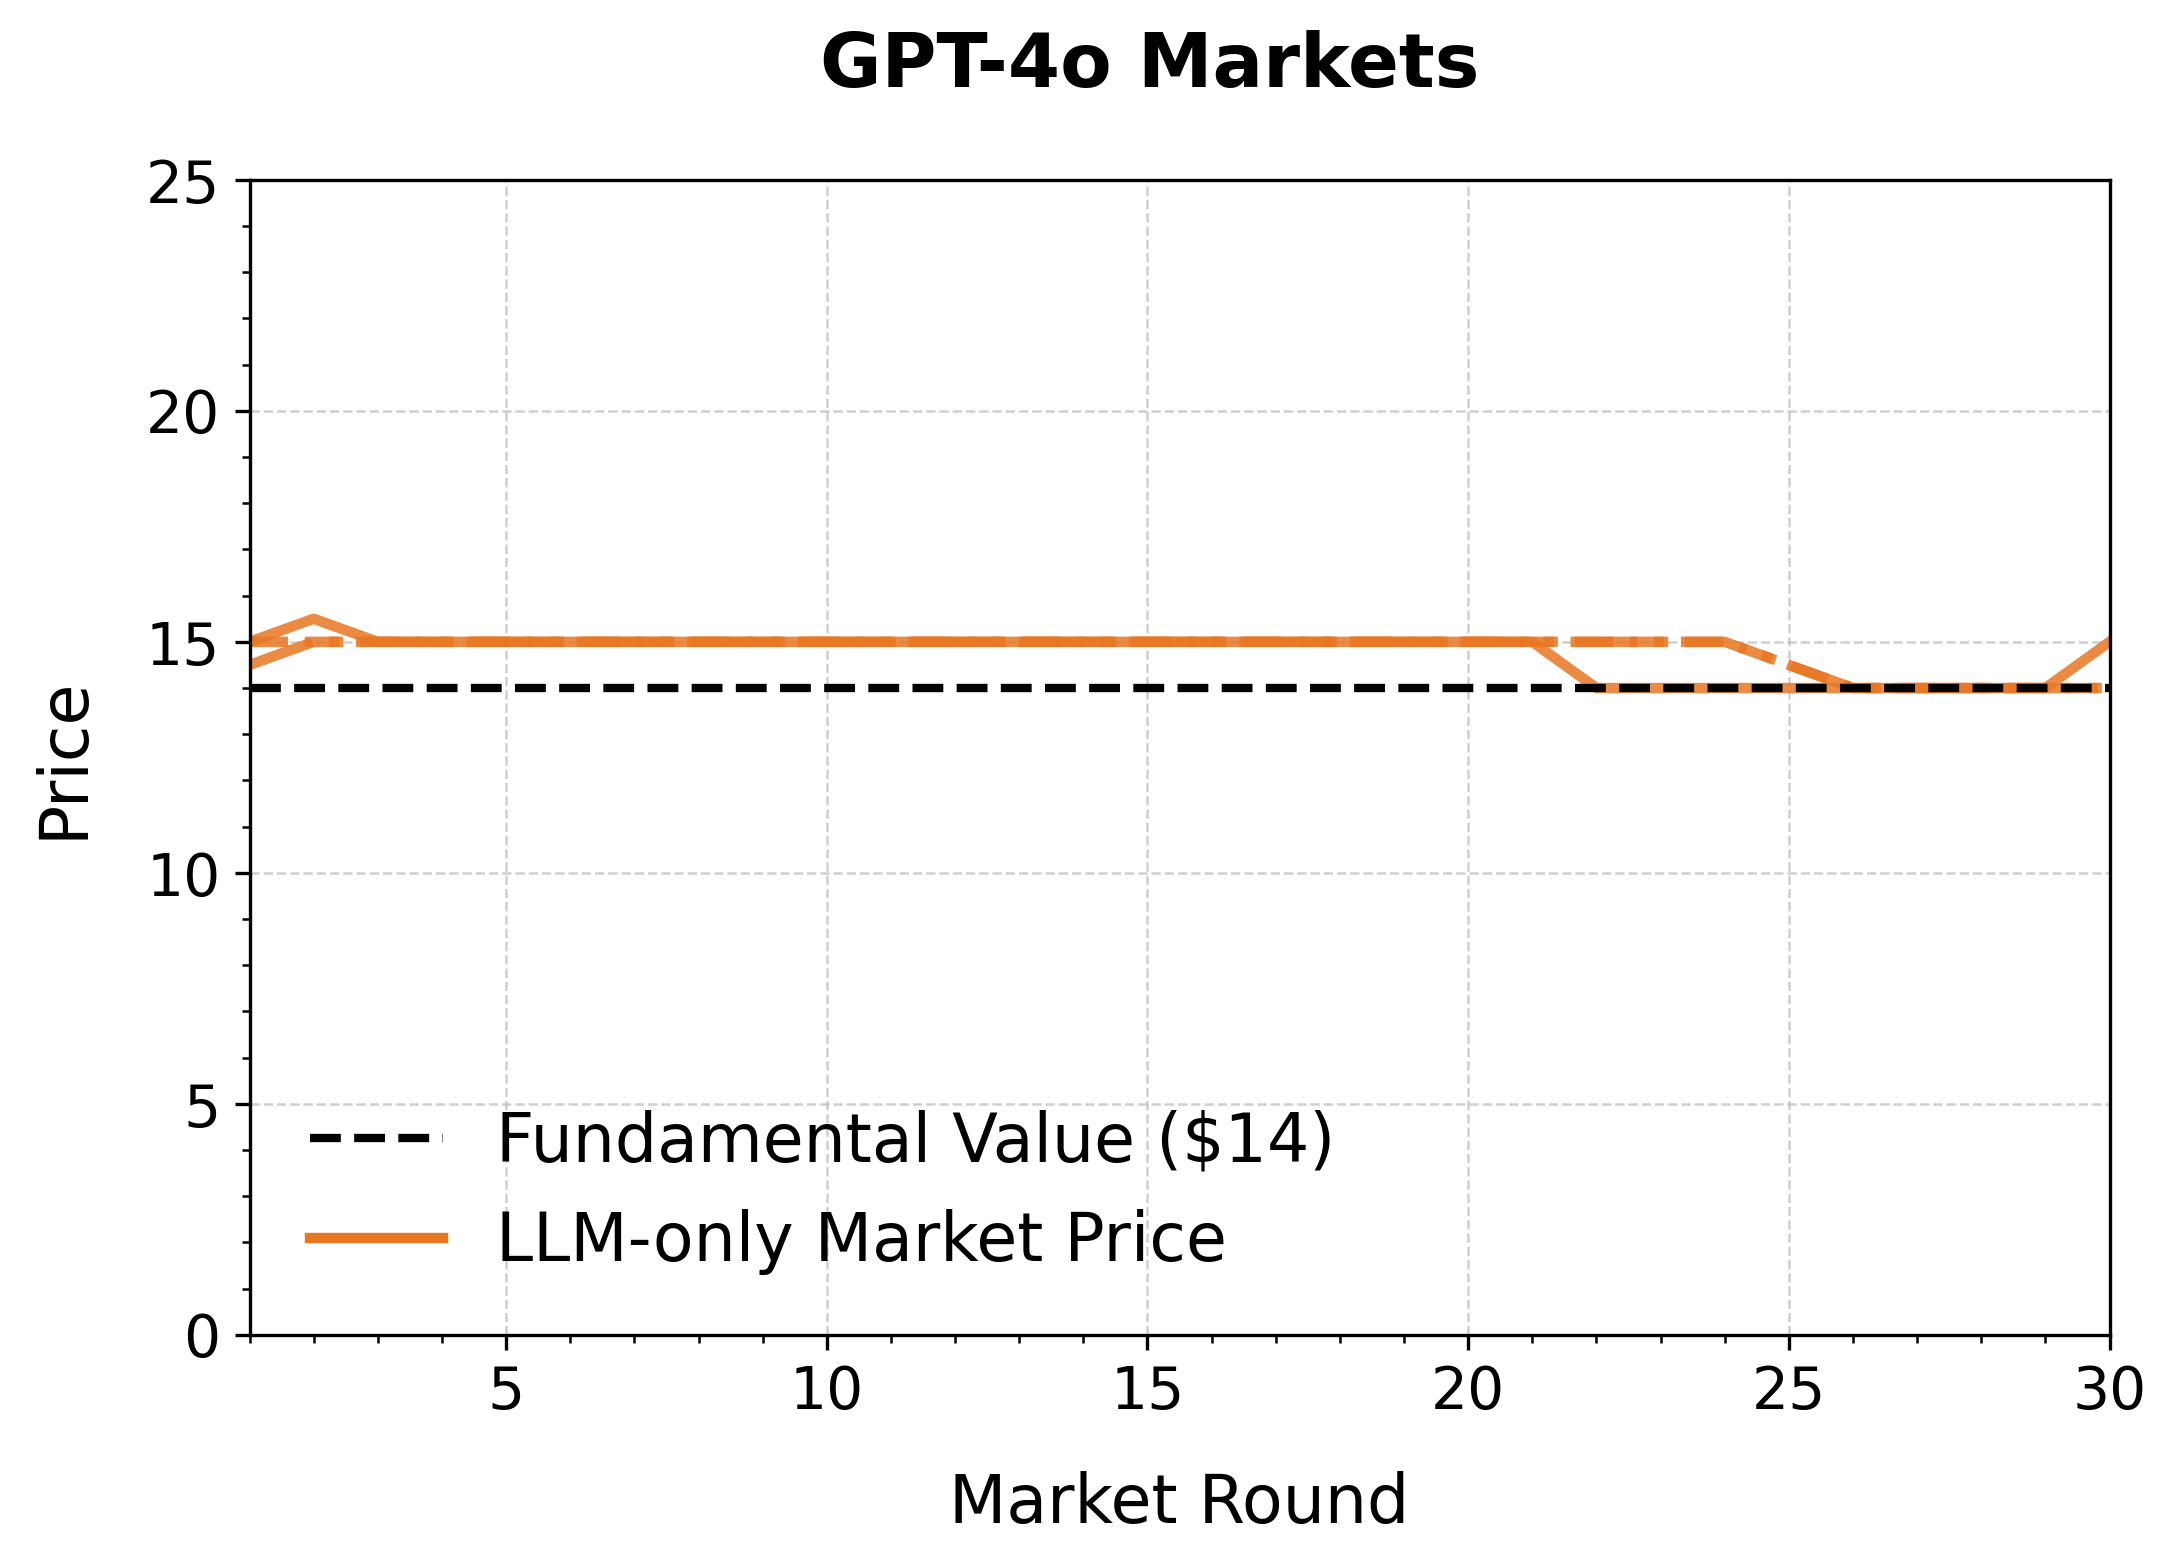

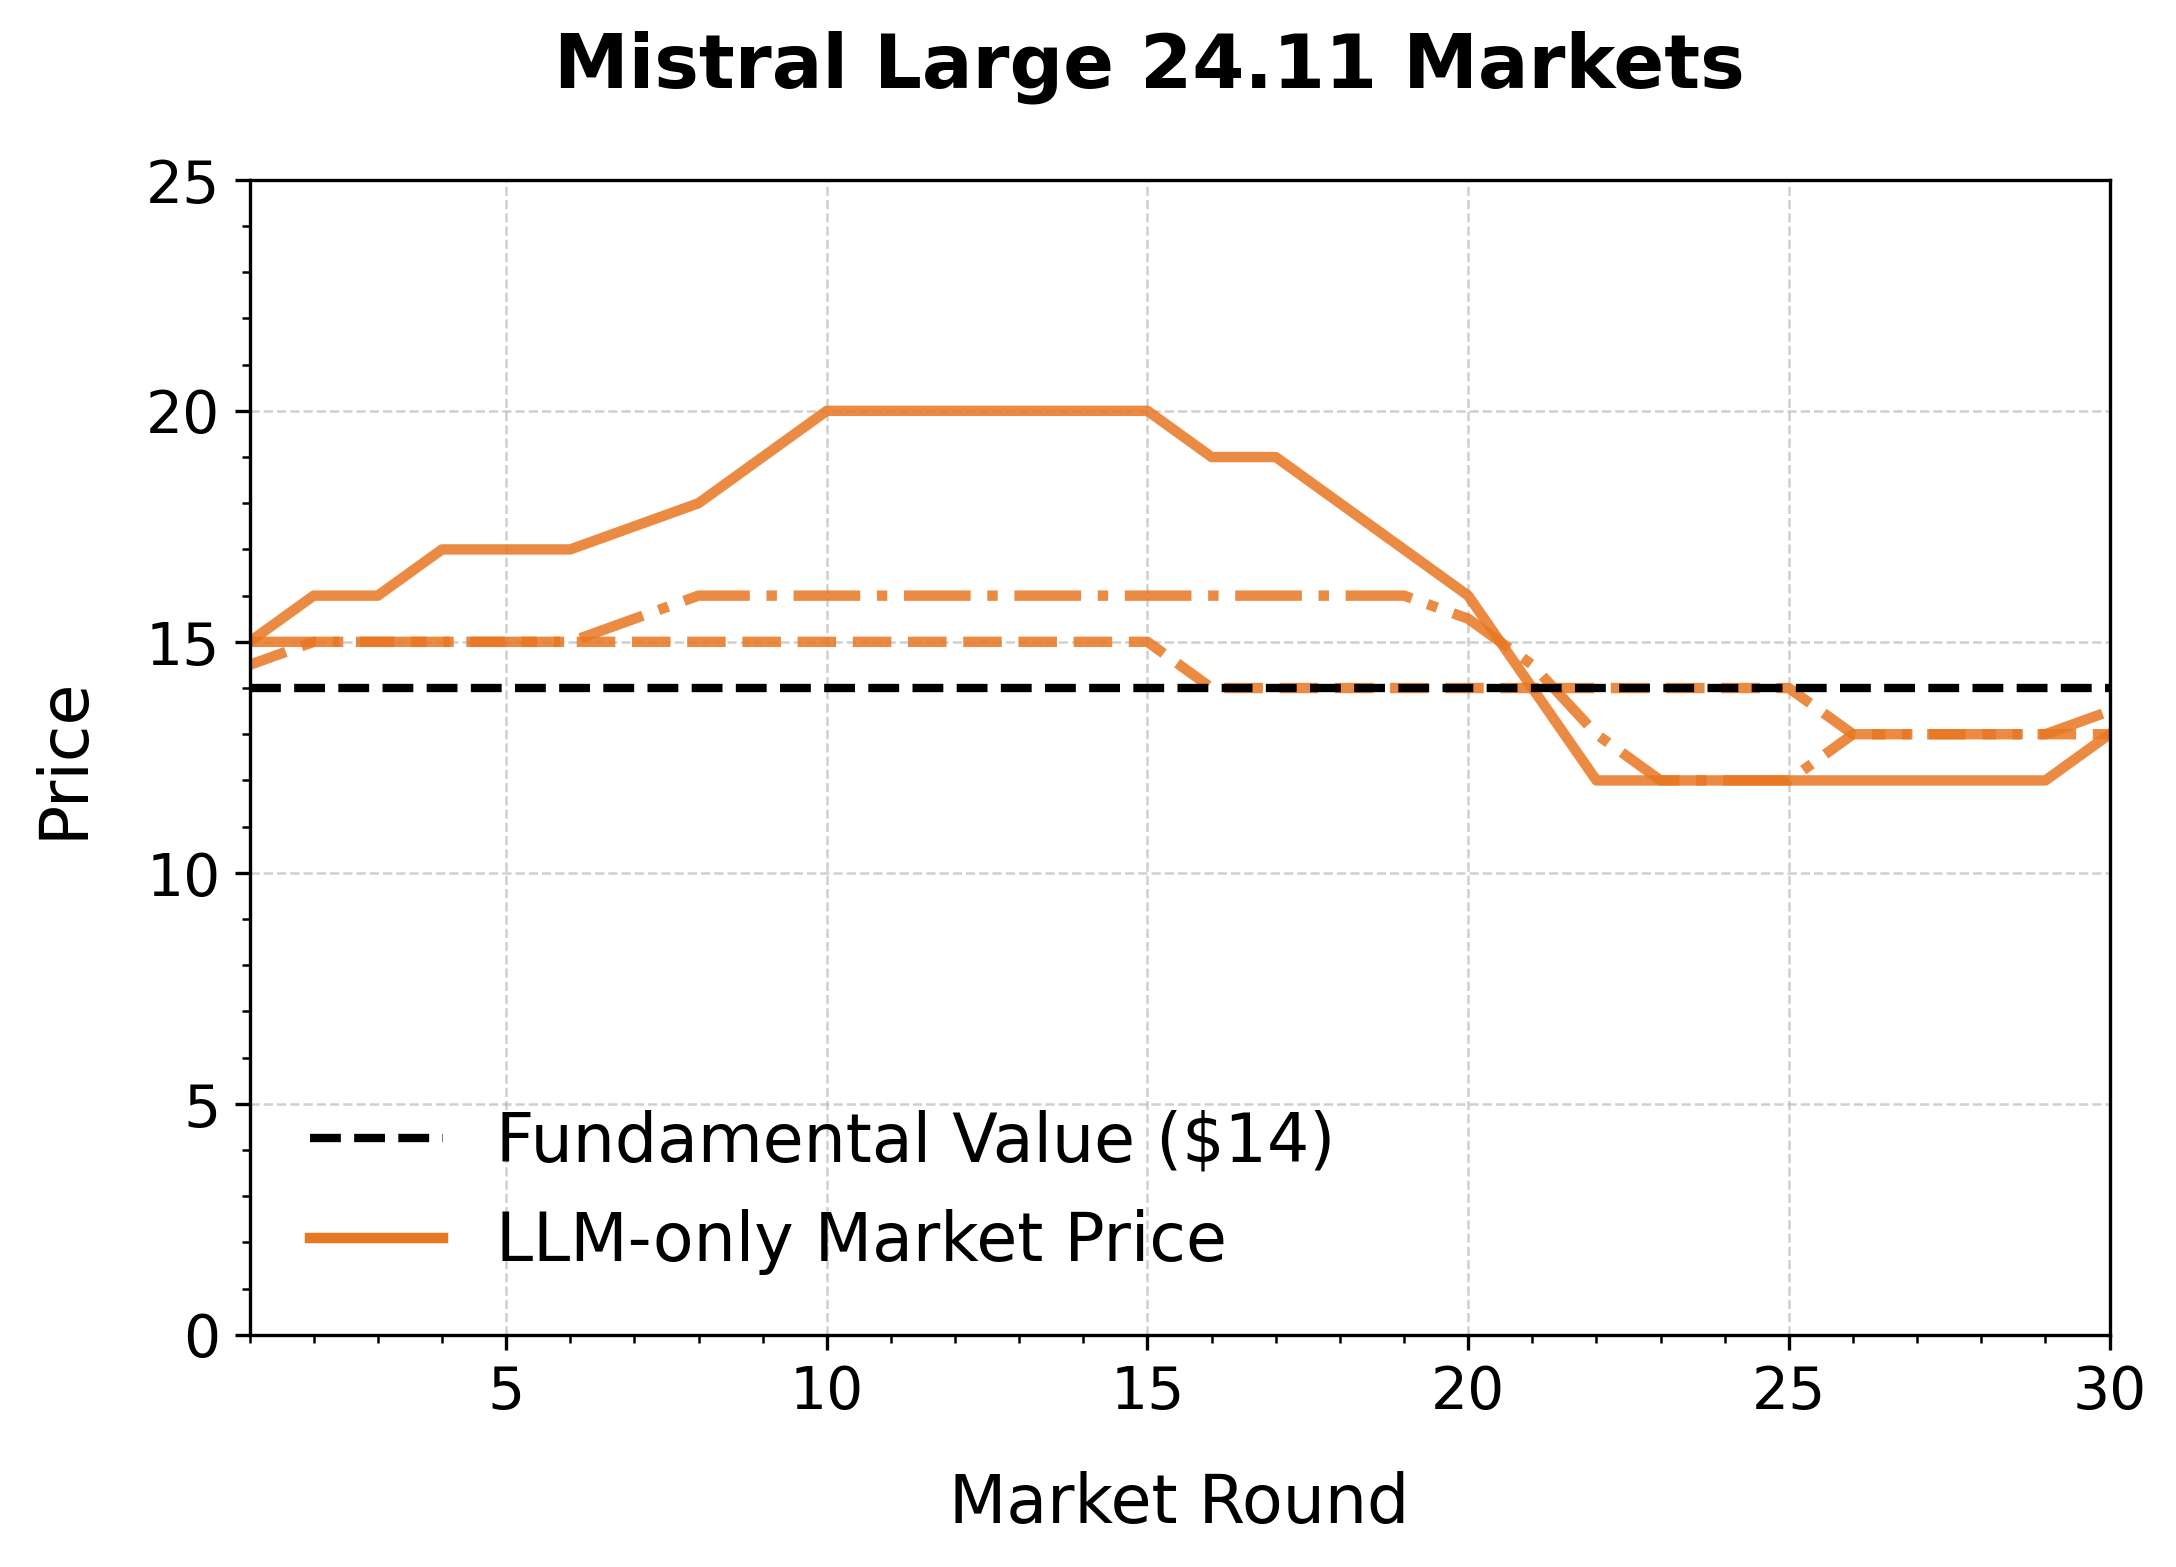

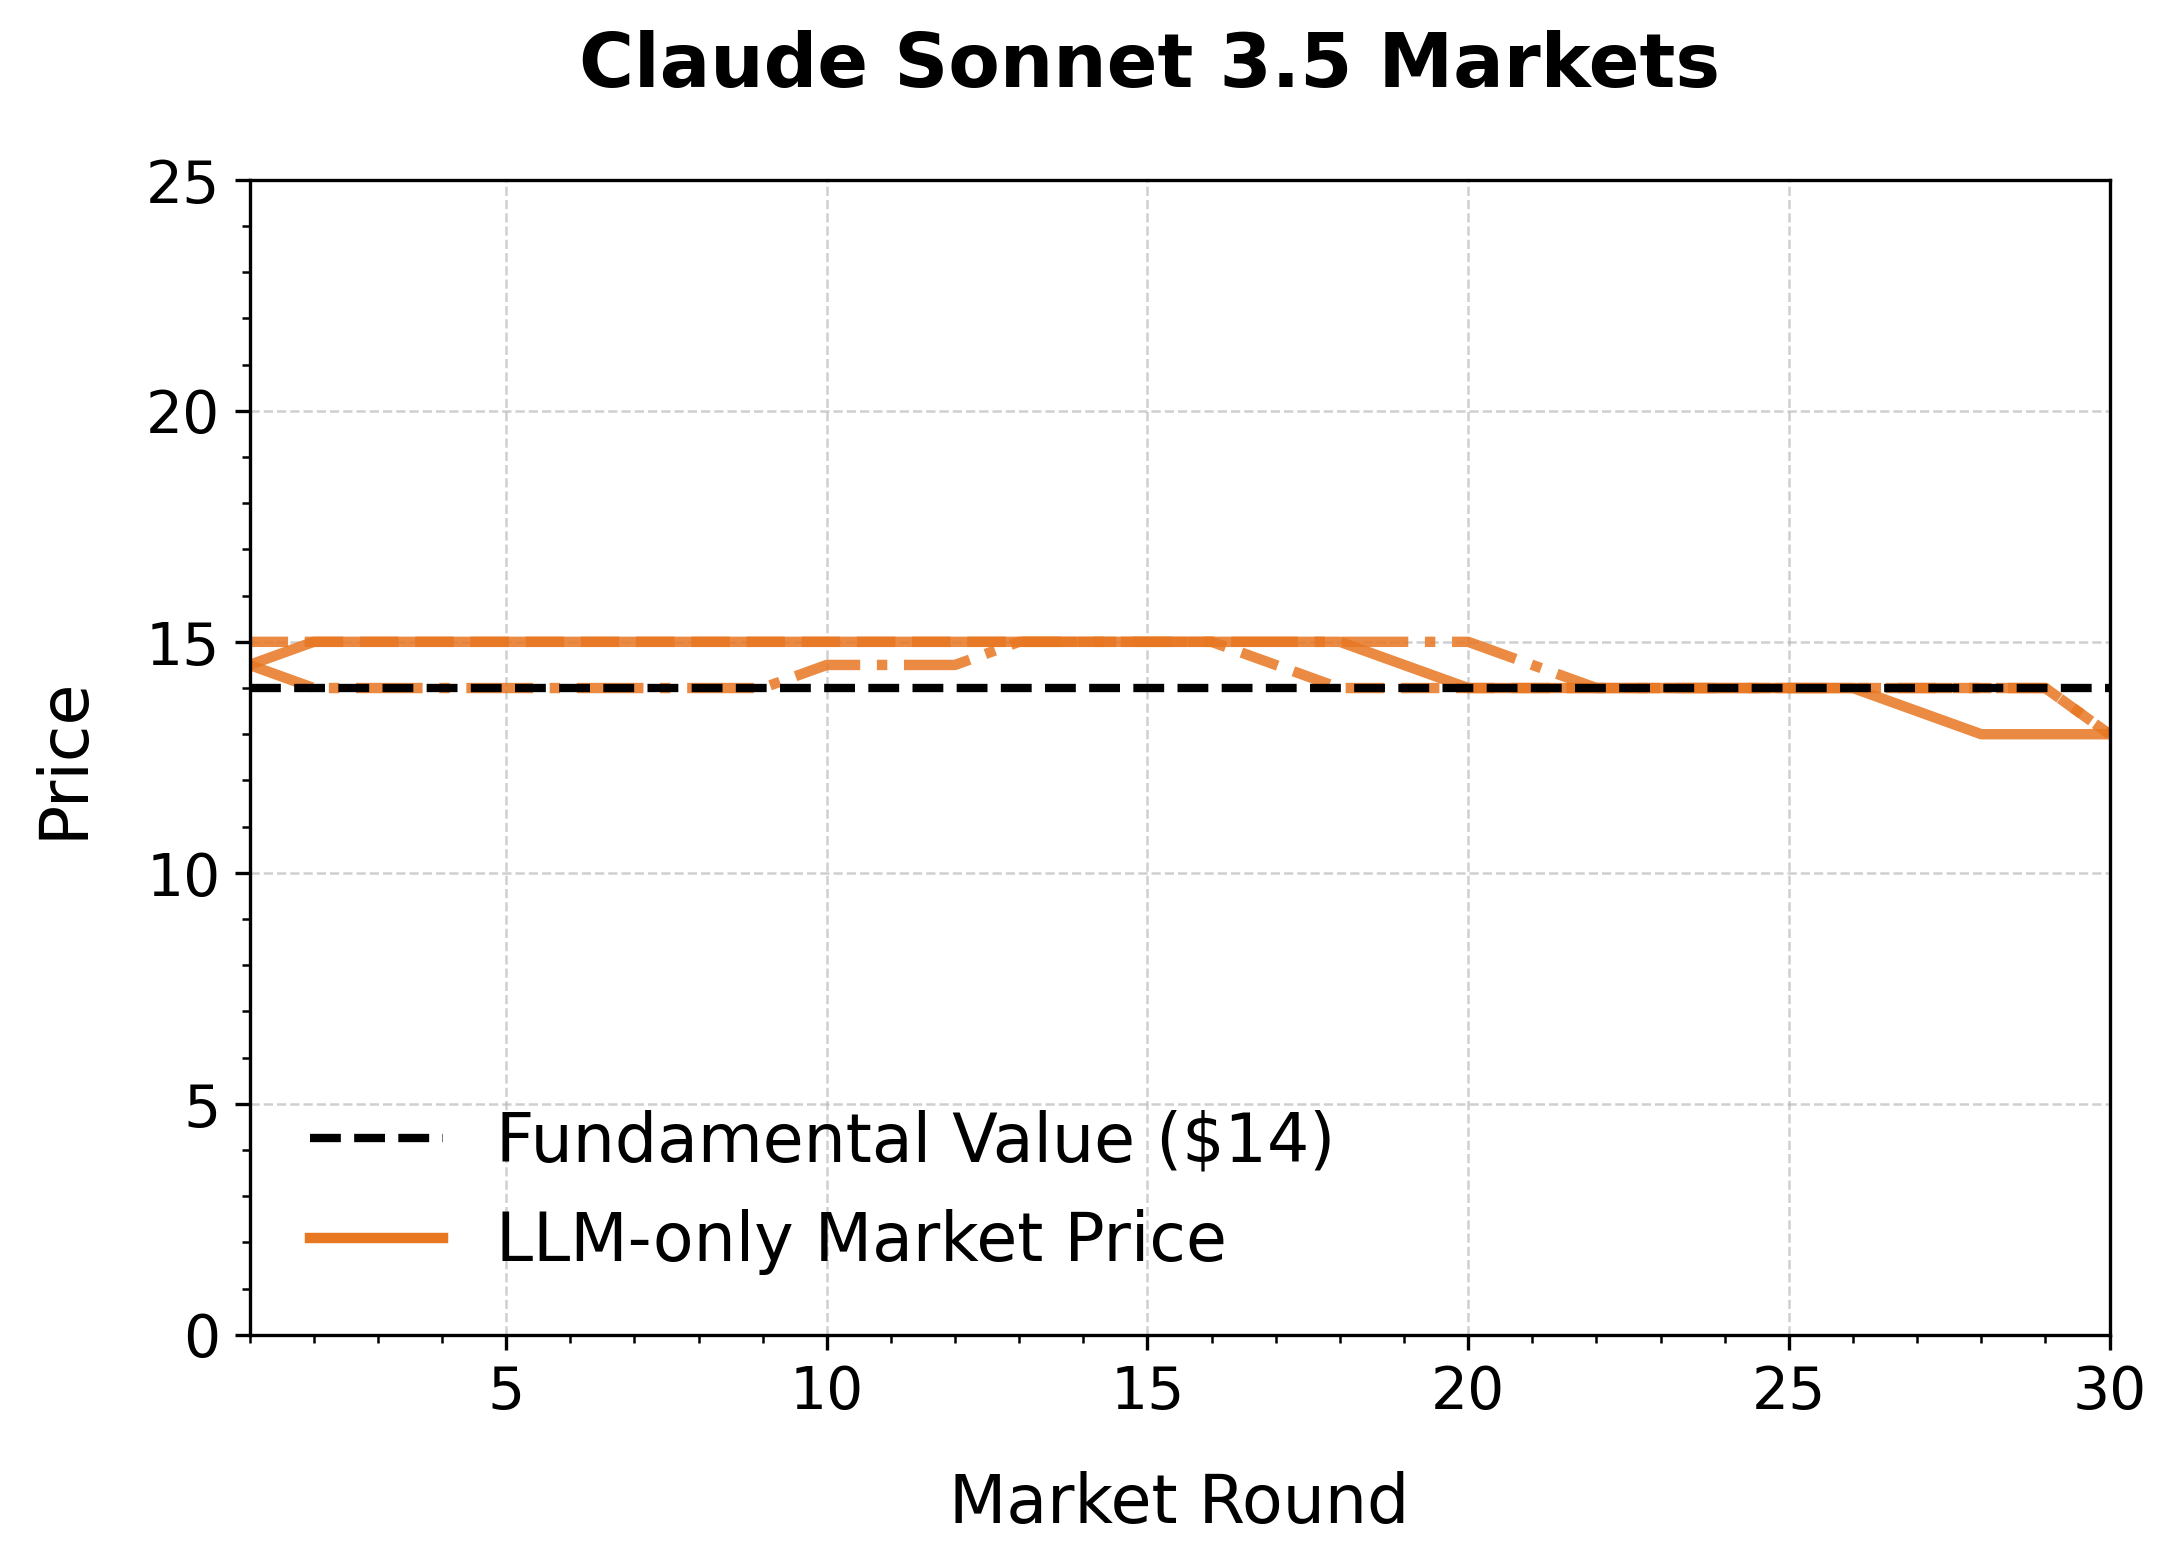

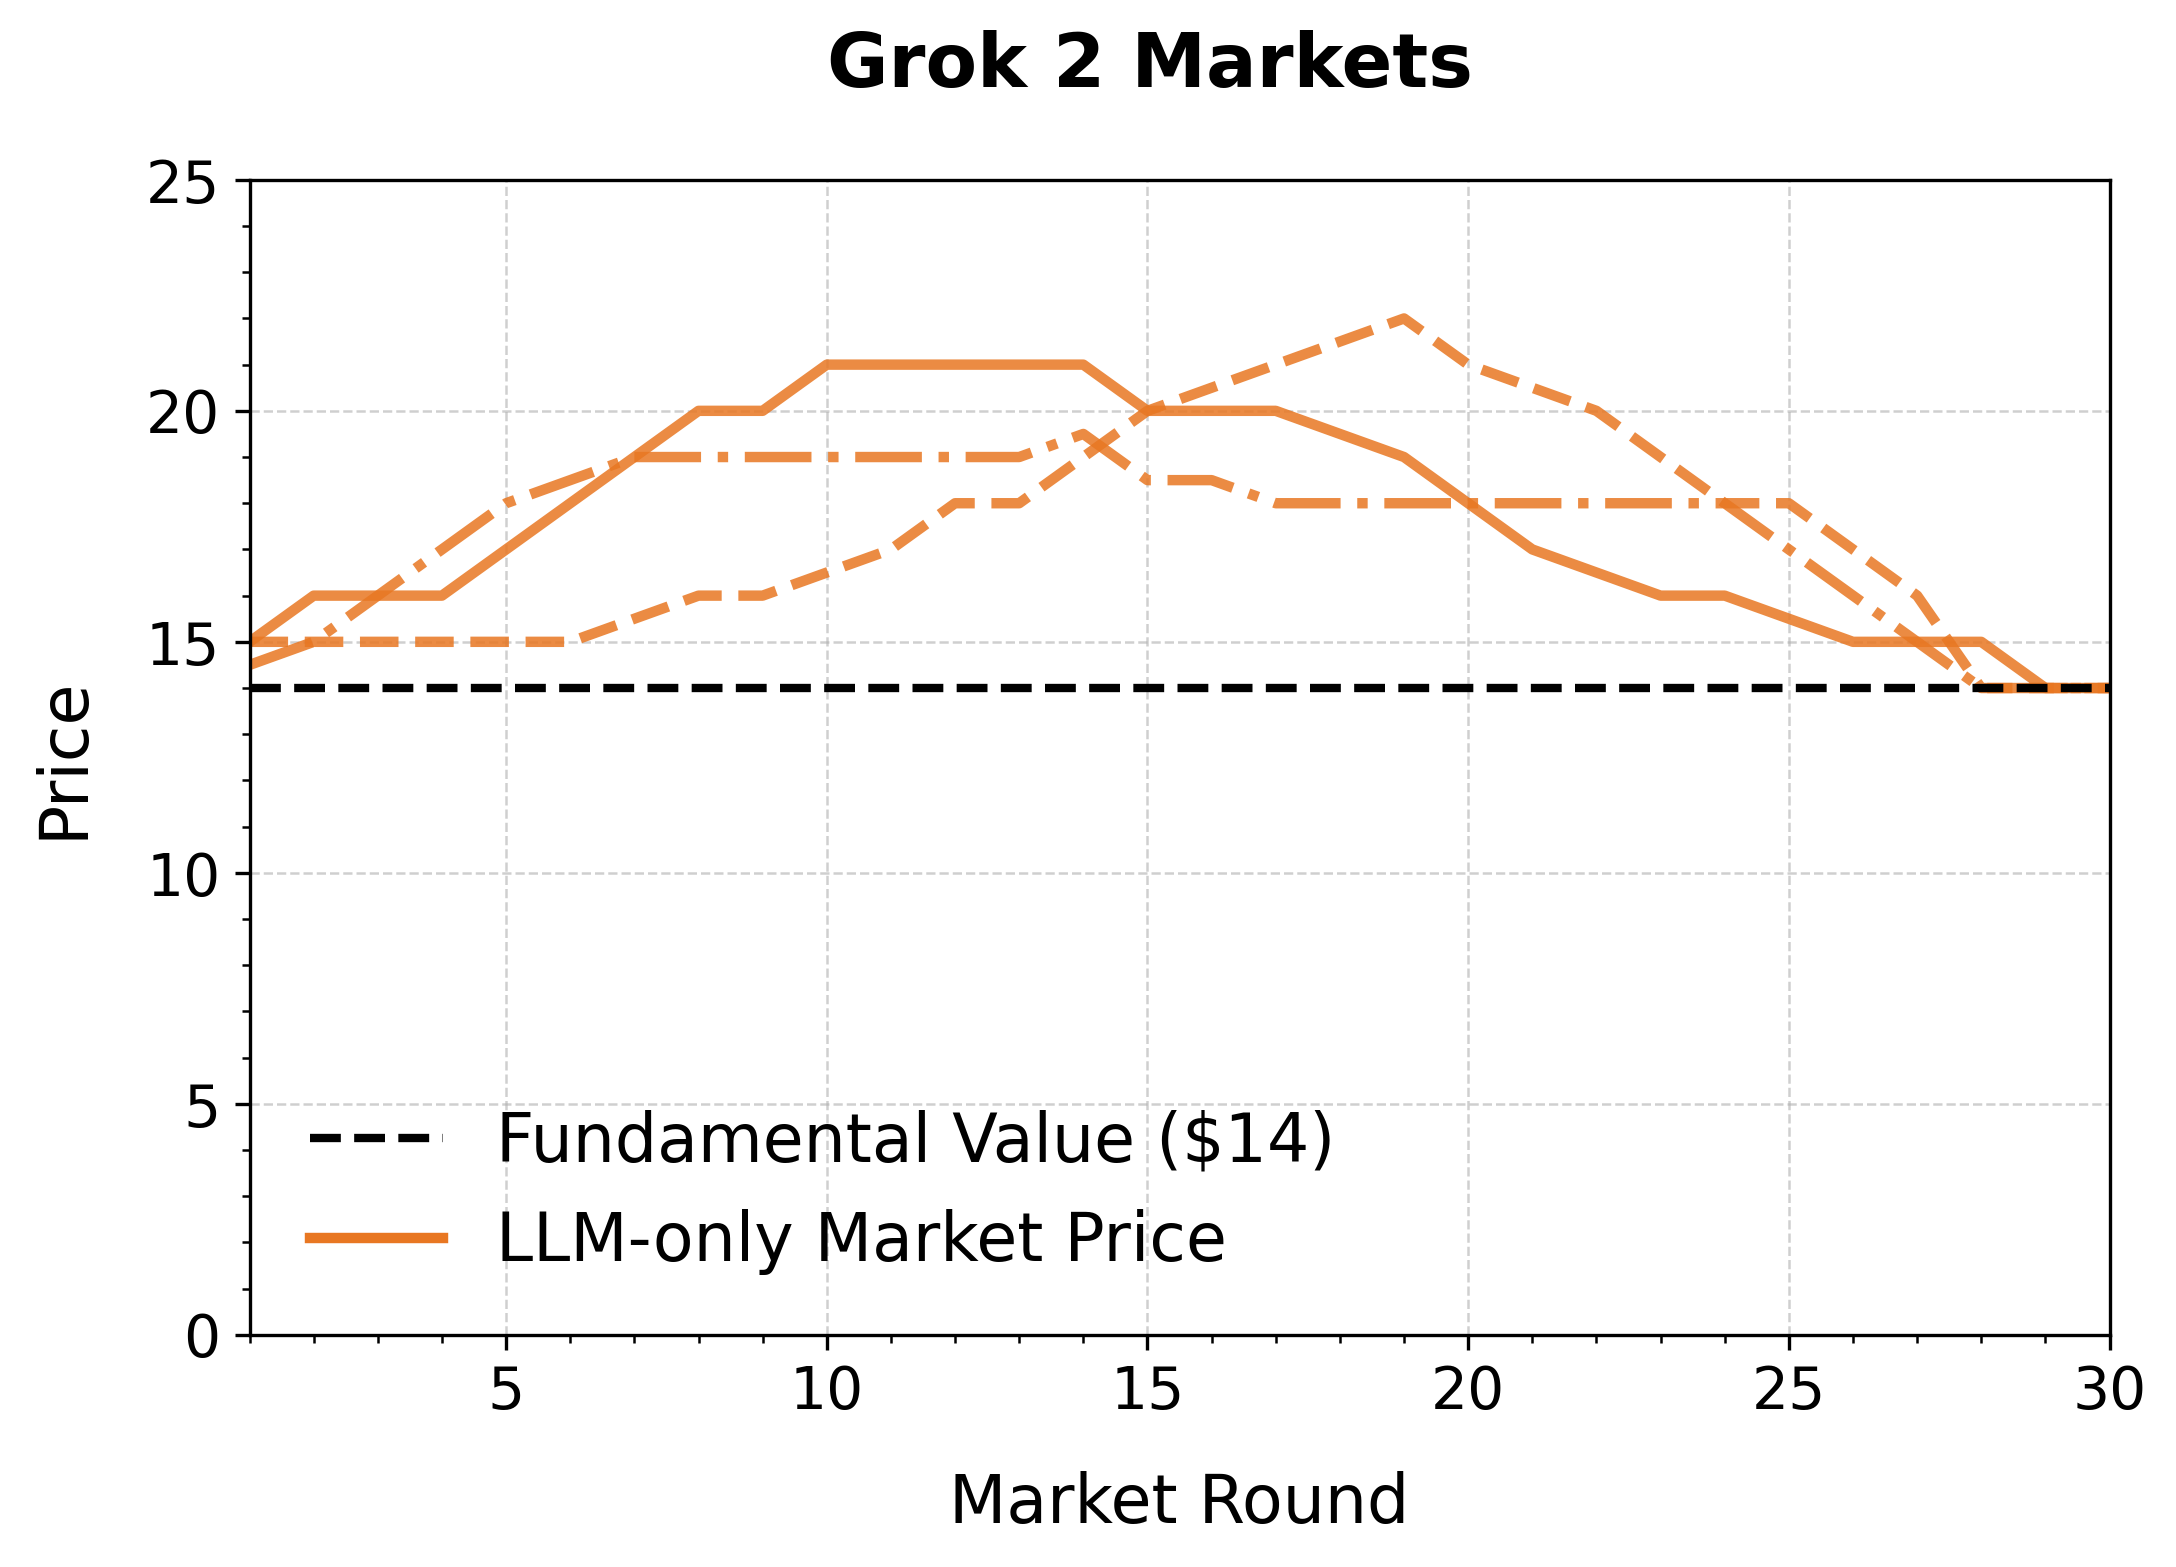

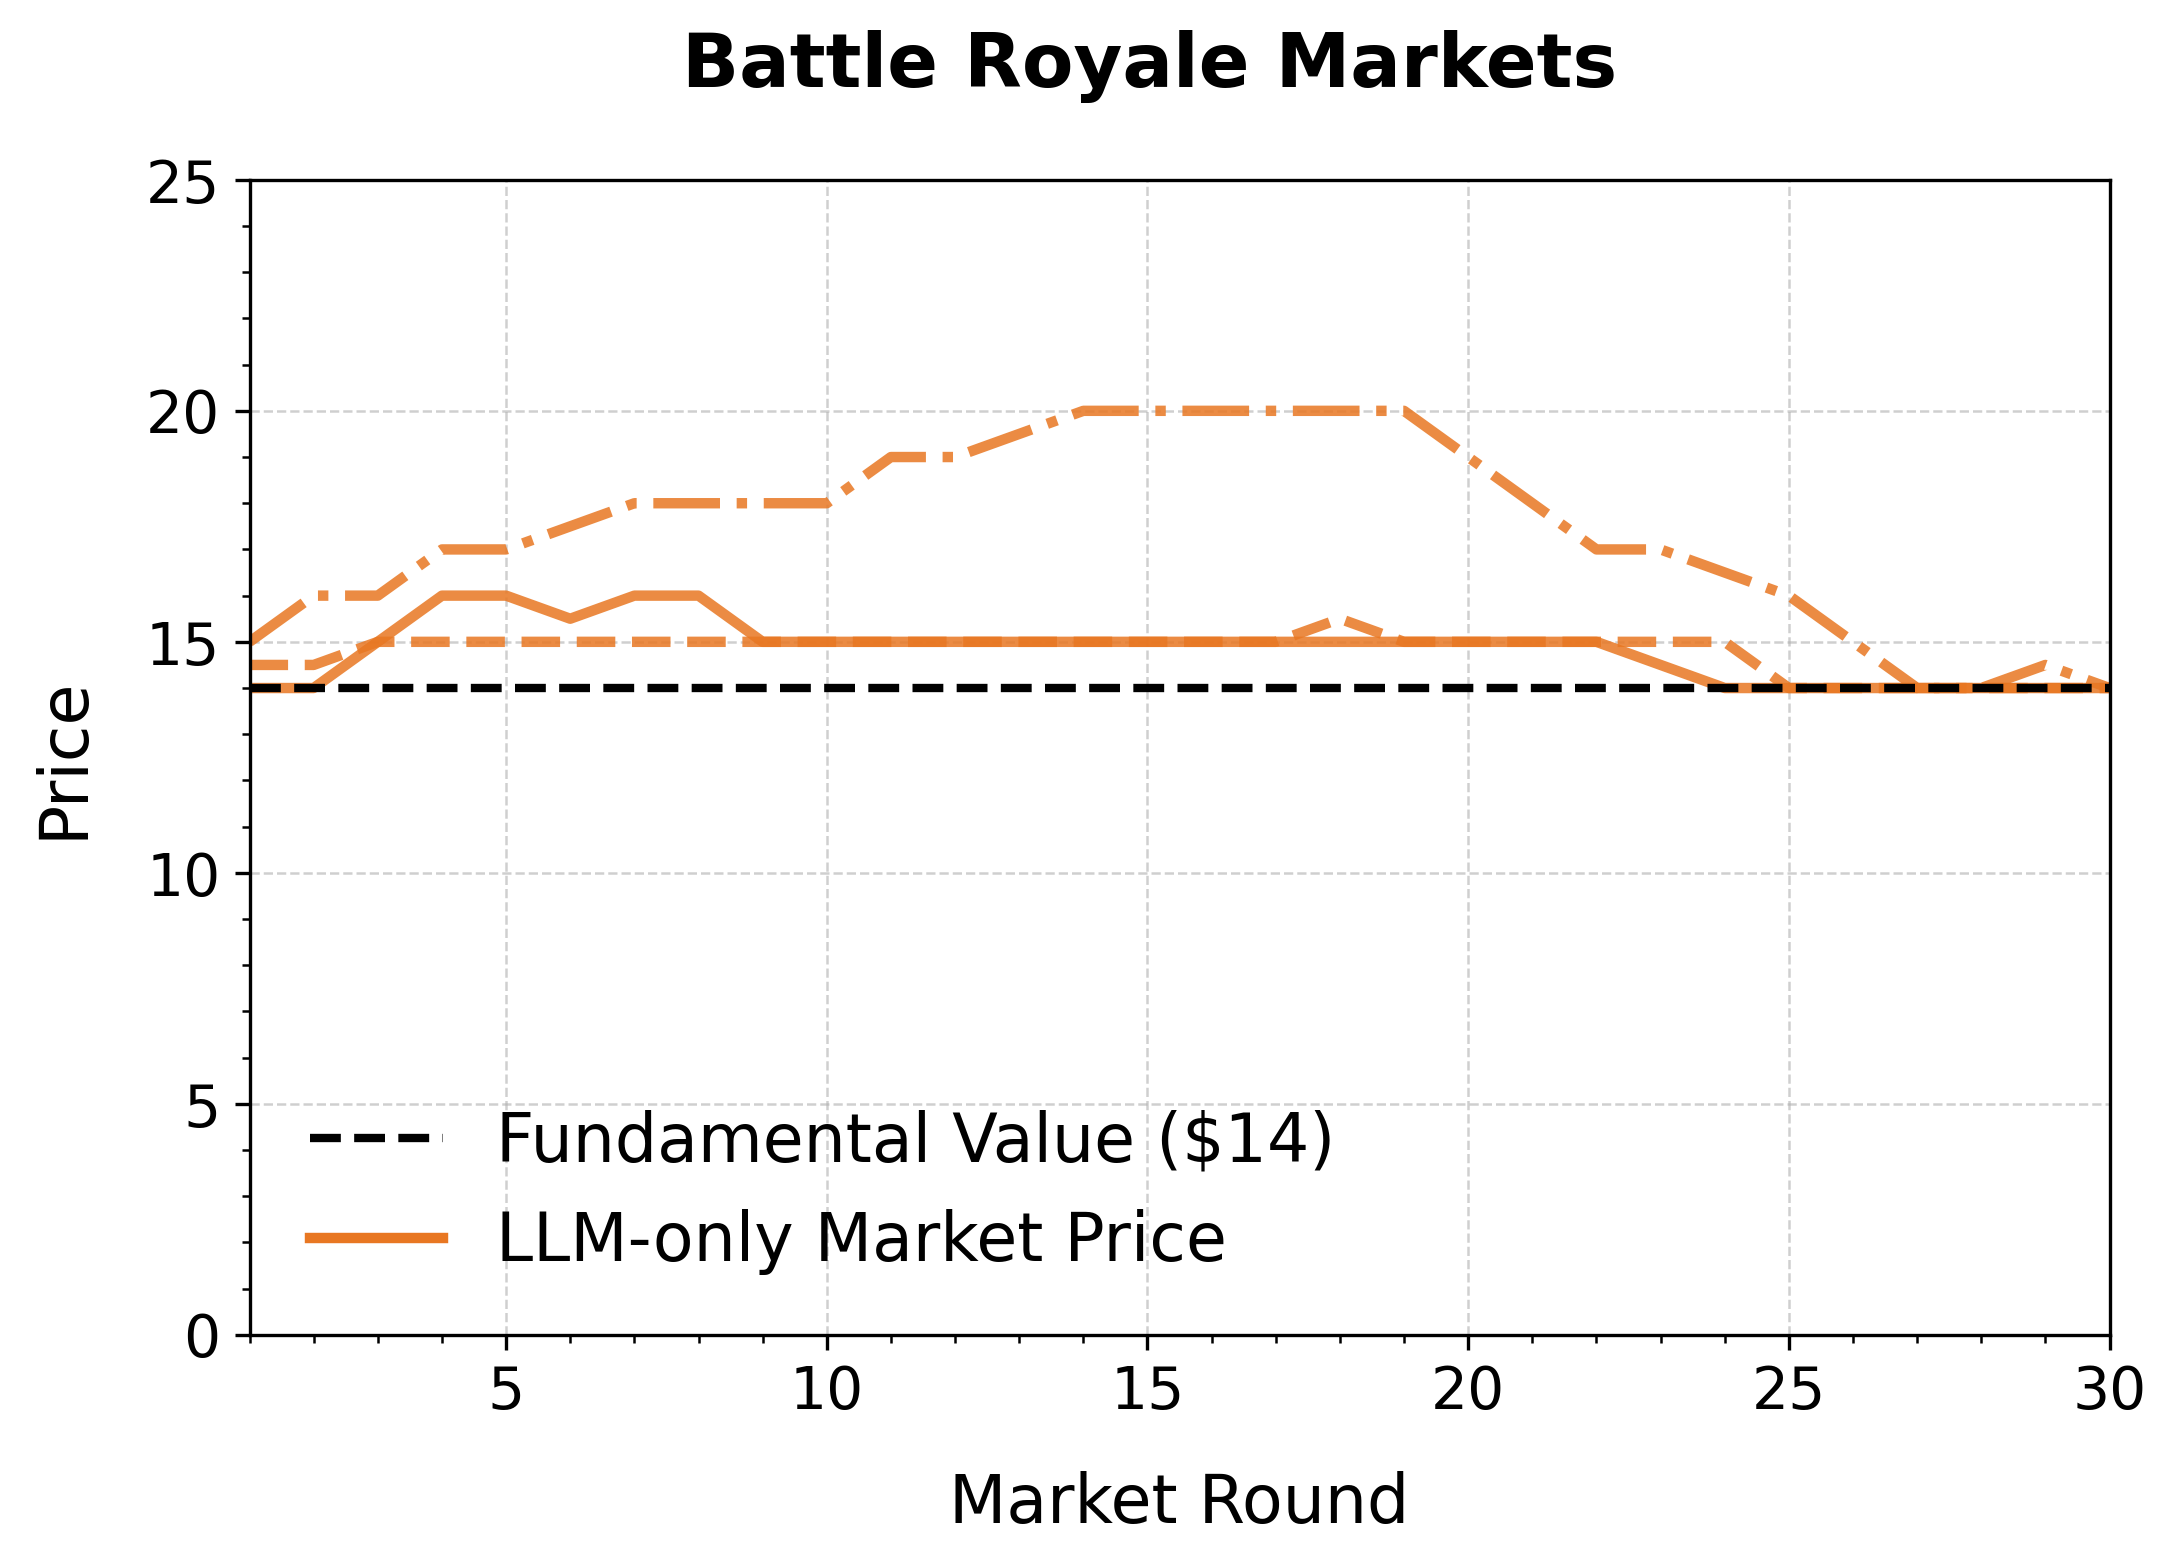

In [112]:
for model in model_runs.keys():
    plot_multiple_runs_overlaid(model_runs[model], f"{model} Markets", False)

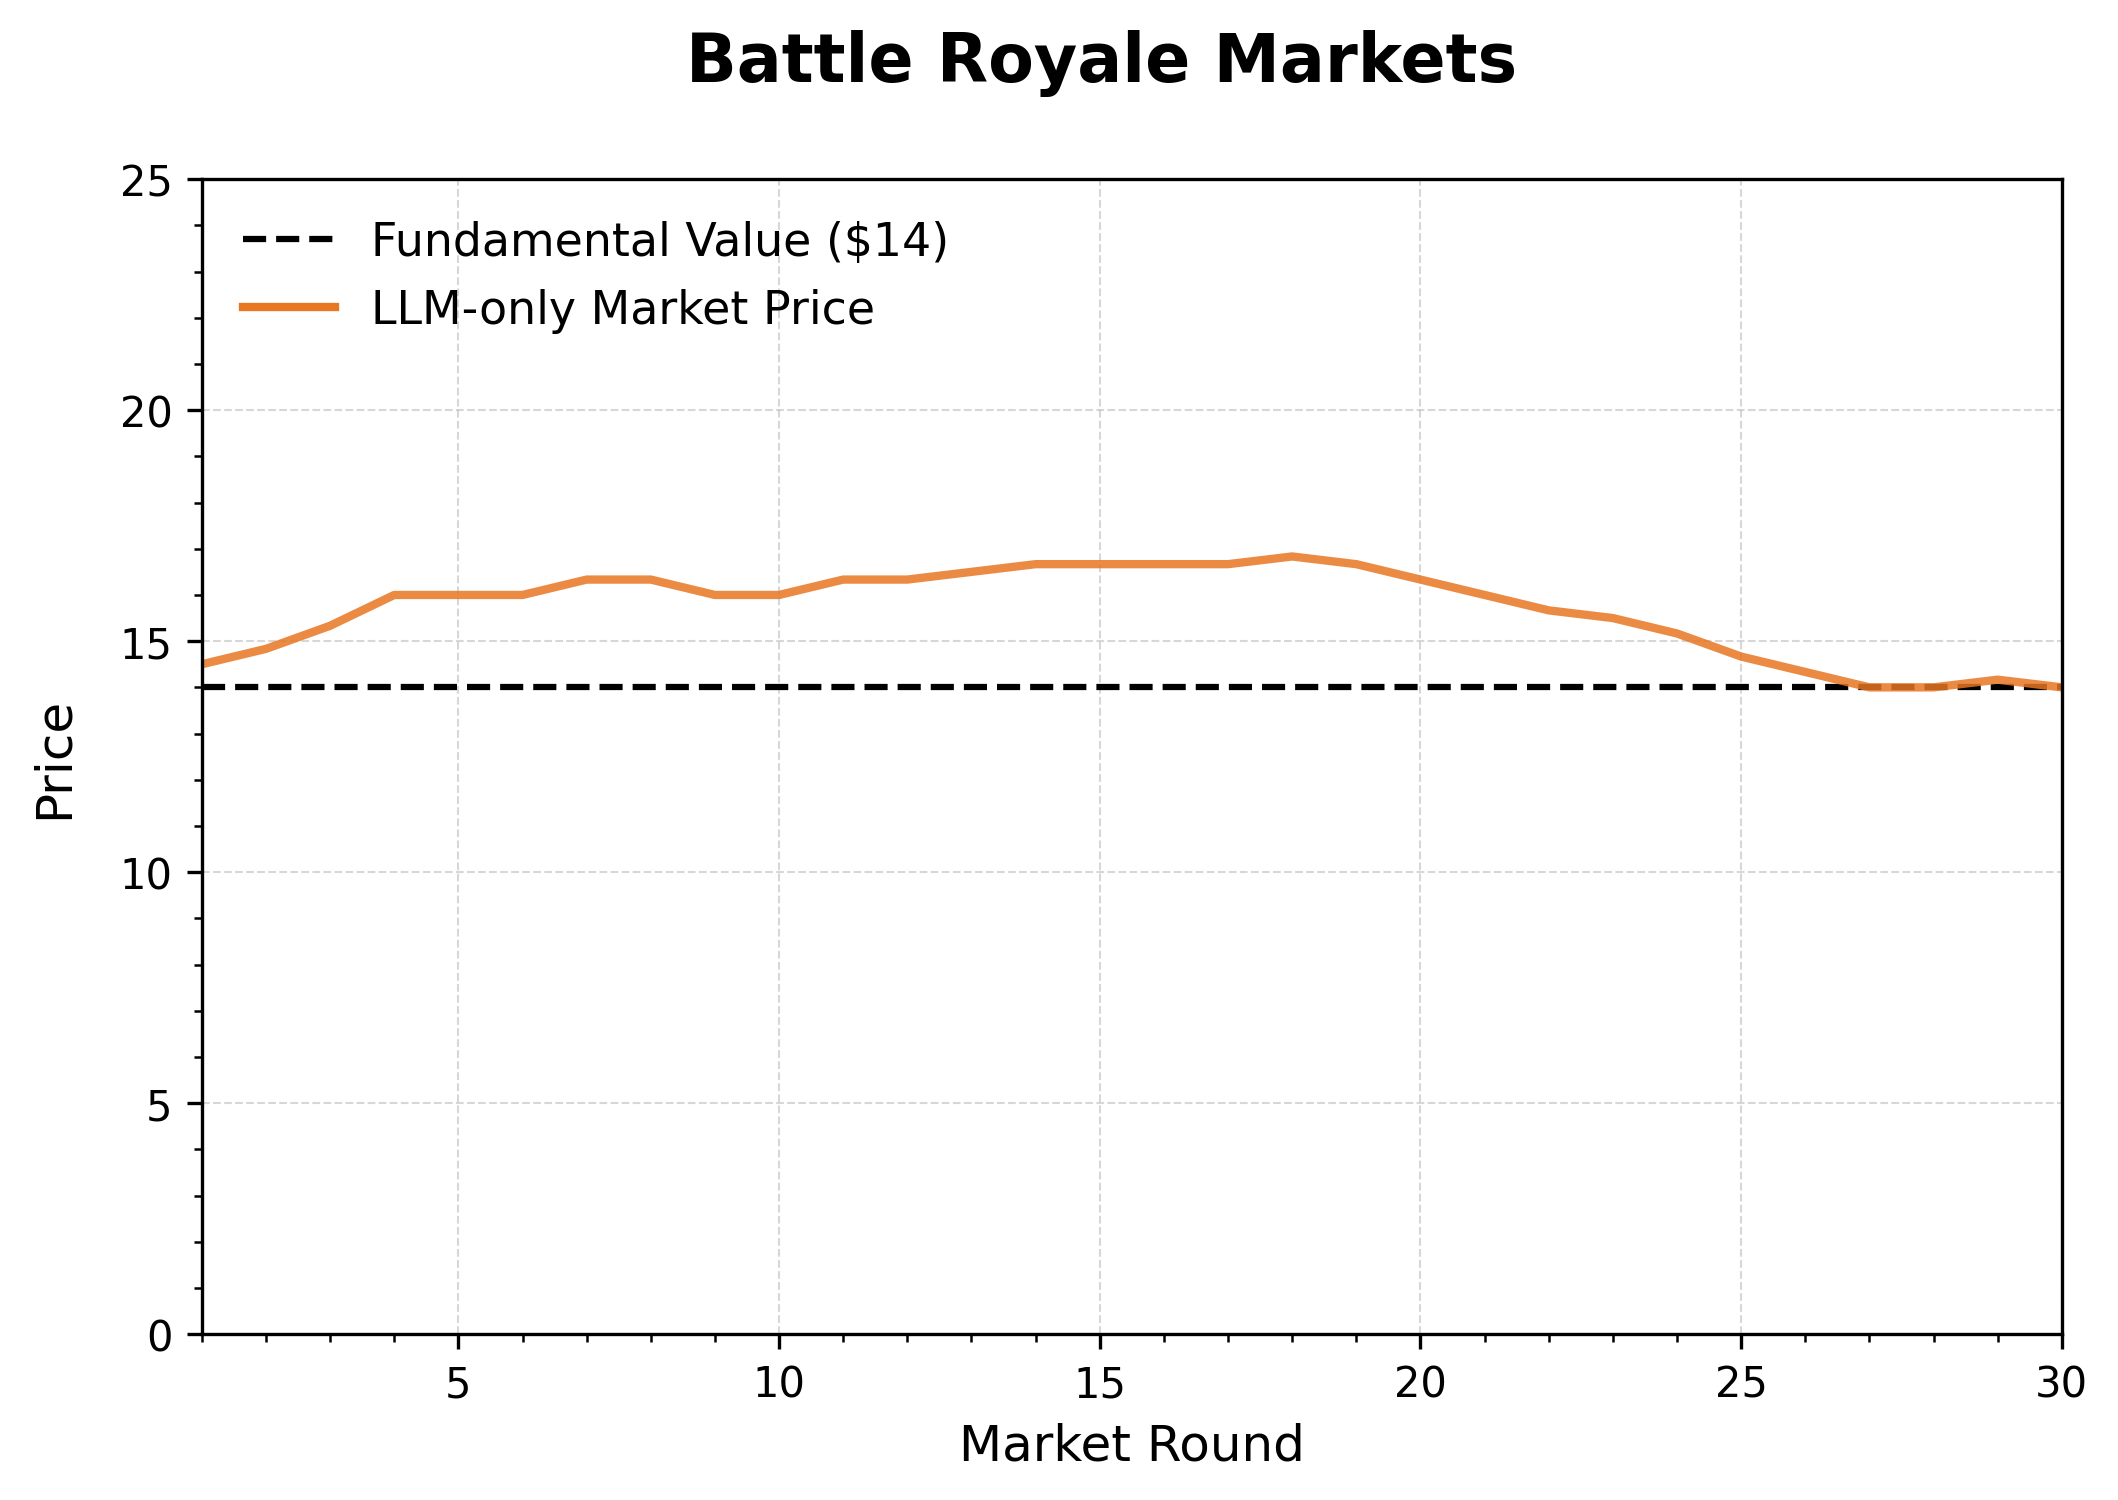

In [37]:
plot_multiple_runs_averaged(model_runs["Battle Royale"], "Battle Royale Markets", False)

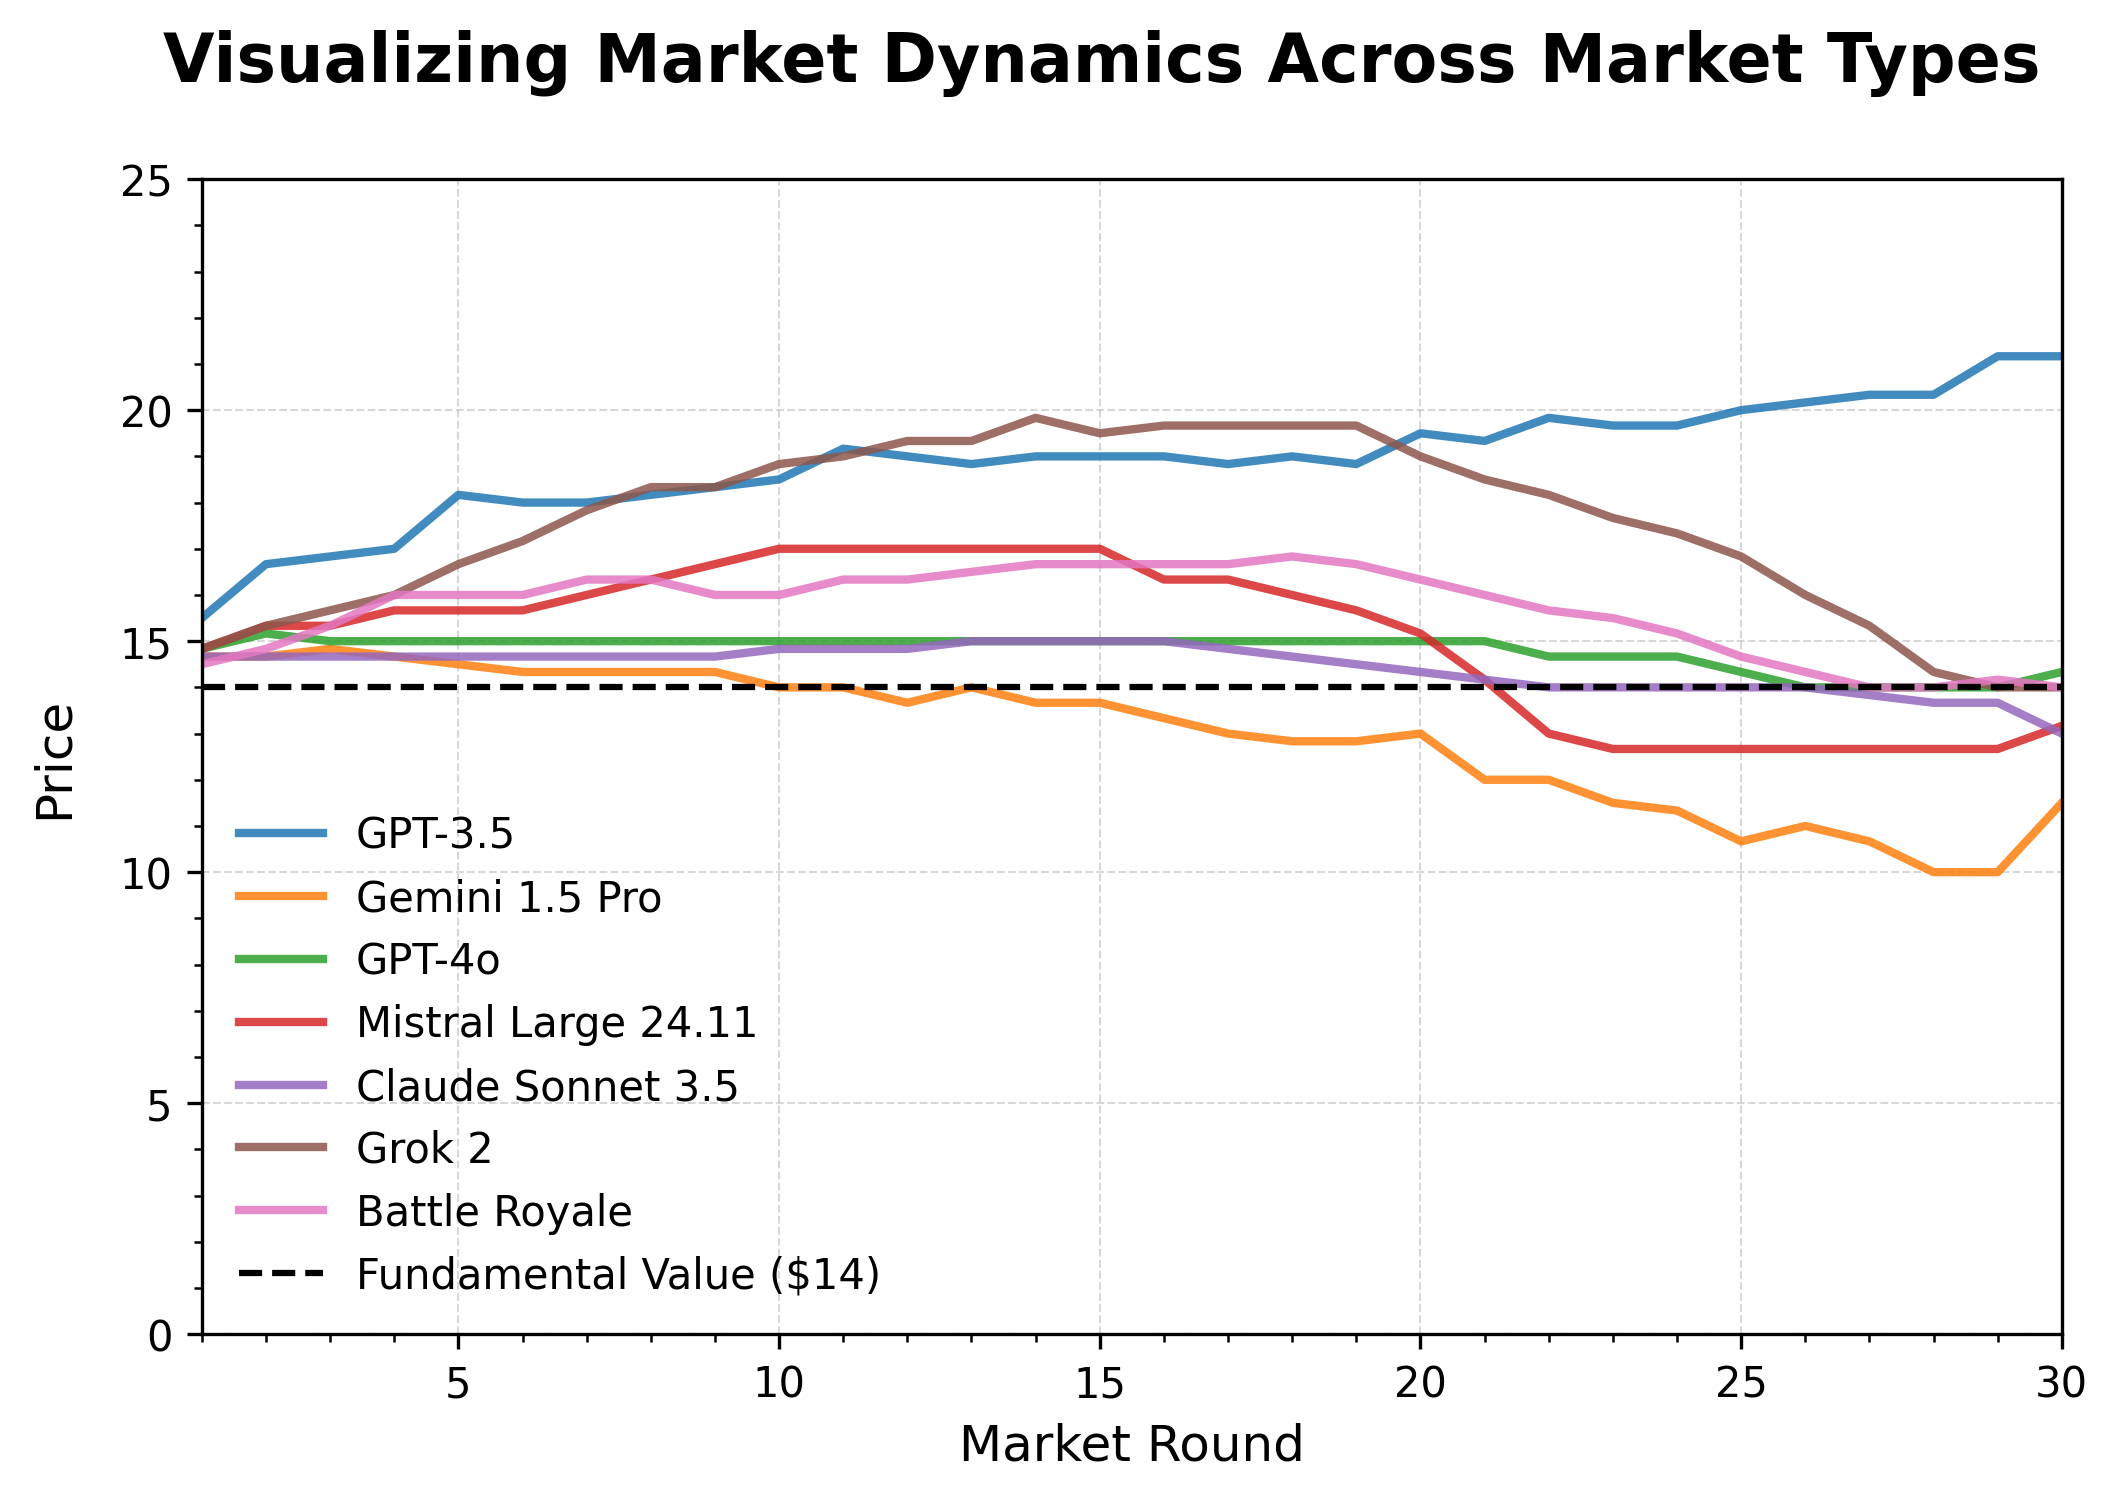

In [132]:
plot_multiple_runs_averaged_overlaid(model_runs, "Visualizing Market Dynamics Across Market Types", False)

In [131]:
for model in model_runs.keys():
    print(f"Model: {model}")
    print(f"MSE: {compute_mse_values(model_runs[model])}")
    print(f"Pearson: {compute_pearson_values(model_runs[model])}")

Model: GPT-3.5
MSE of human mean price relative to fundamental price: 429.80
MSE: (26.366666666666664, 263.23687288396434)
Pearson: 0.48967479907747324
Model: Gemini 1.5 Pro
MSE of human mean price relative to fundamental price: 429.80
MSE: (4.111111111111112, 482.9585103108648)
Pearson: -0.4009232064475907
Model: GPT-4o
MSE of human mean price relative to fundamental price: 429.80
MSE: (0.7888888888888889, 401.2836565096954)
Pearson: 0.04972169833873006
Model: Mistral Large 24.11
MSE of human mean price relative to fundamental price: 429.80
MSE: (5.6944444444444455, 398.0430132348415)
Pearson: -0.11184267798072299
Model: Claude Sonnet 3.5
MSE of human mean price relative to fundamental price: 429.80
MSE: (0.5361111111111111, 414.3291243459526)
Pearson: 0.013282557098097262
Model: Grok 2
MSE of human mean price relative to fundamental price: 429.80
MSE: (17.325, 293.2454986149584)
Pearson: 0.5582437568070554
Model: Battle Royale
MSE of human mean price relative to fundamental price: 42

In [5]:
compute_pv_var([25, 26, 27])

[707, 617, 664, 634, 707, 685, 730, 643, 611, 612, 683, 644, 637, 702, 688, 683, 701, 697, 673, 685, 605, 673, 659, 694, 702, 581, 777, 709, 662, 697, 732, 666, 658, 667, 689, 636, 707, 713, 717, 625, 711, 642, 713, 695, 651, 698, 723, 717, 643, 603, 726, 709, 695, 659, 681, 725, 614, 715, 660, 722]
60
1556.0566666666666


1556.0566666666666

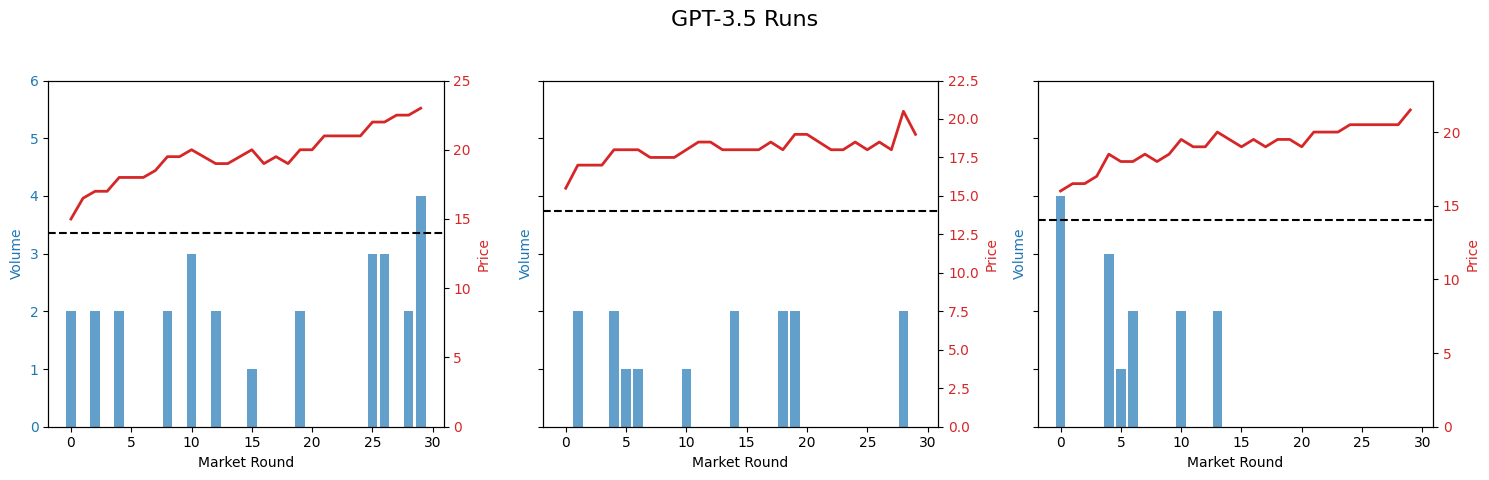

In [6]:
# Plot GPT-3.5 runs
plot_multiple_runs([1, 2, 3], title="GPT-3.5 Runs")

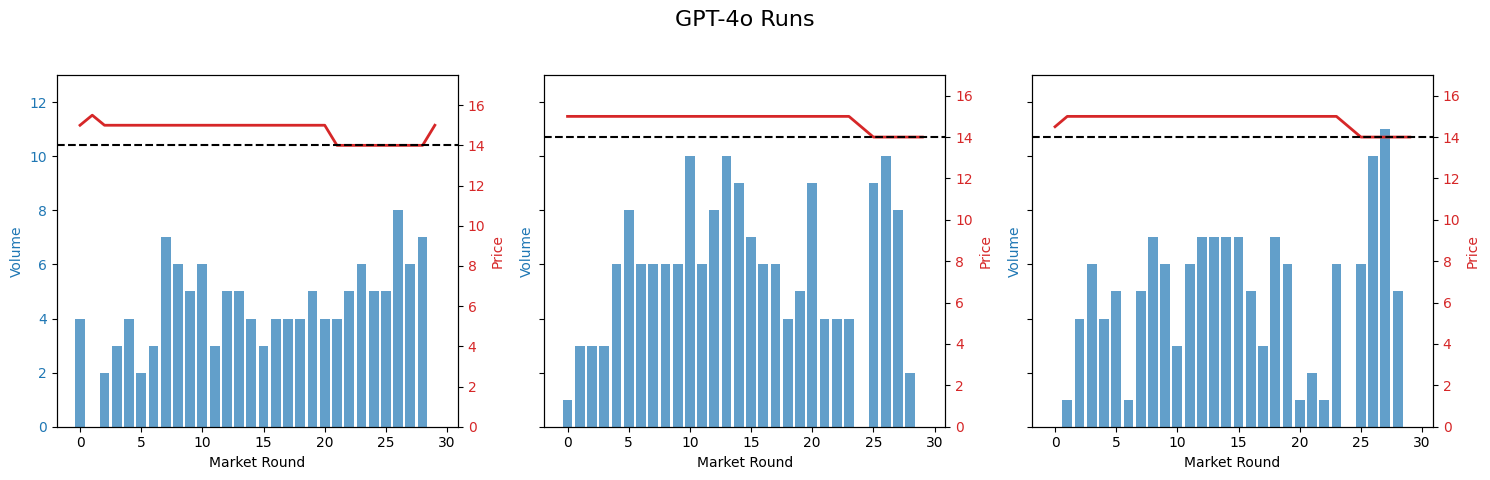

In [7]:
# Plot GPT-4o runs
plot_multiple_runs([8, 9, 10], title="GPT-4o Runs")

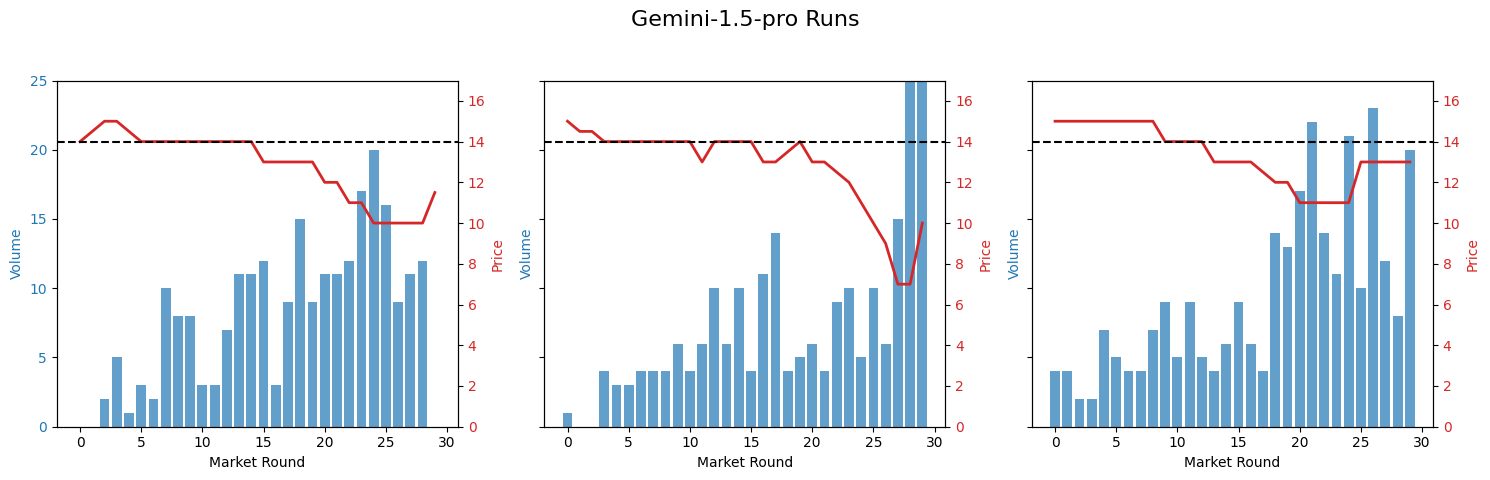

In [8]:
# Plot gemini-1.5-pro
plot_multiple_runs([5, 6, 7], title="Gemini-1.5-pro Runs")

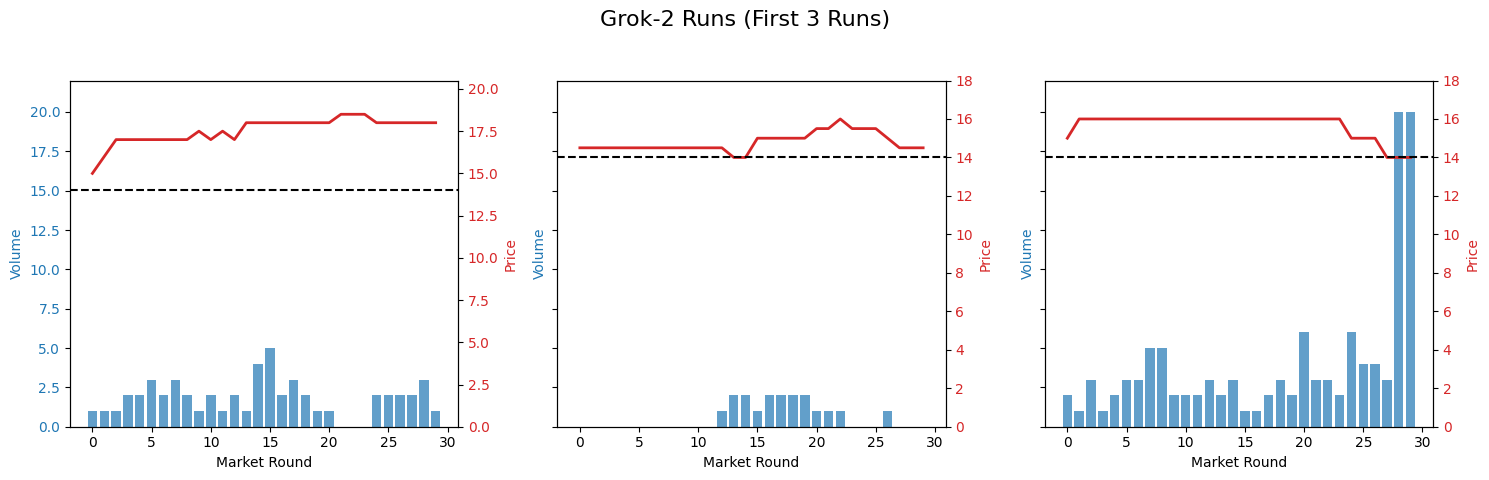

In [9]:
# Plot grok-2 runs
plot_multiple_runs([14, 15, 18], title="Grok-2 Runs (First 3 Runs)")

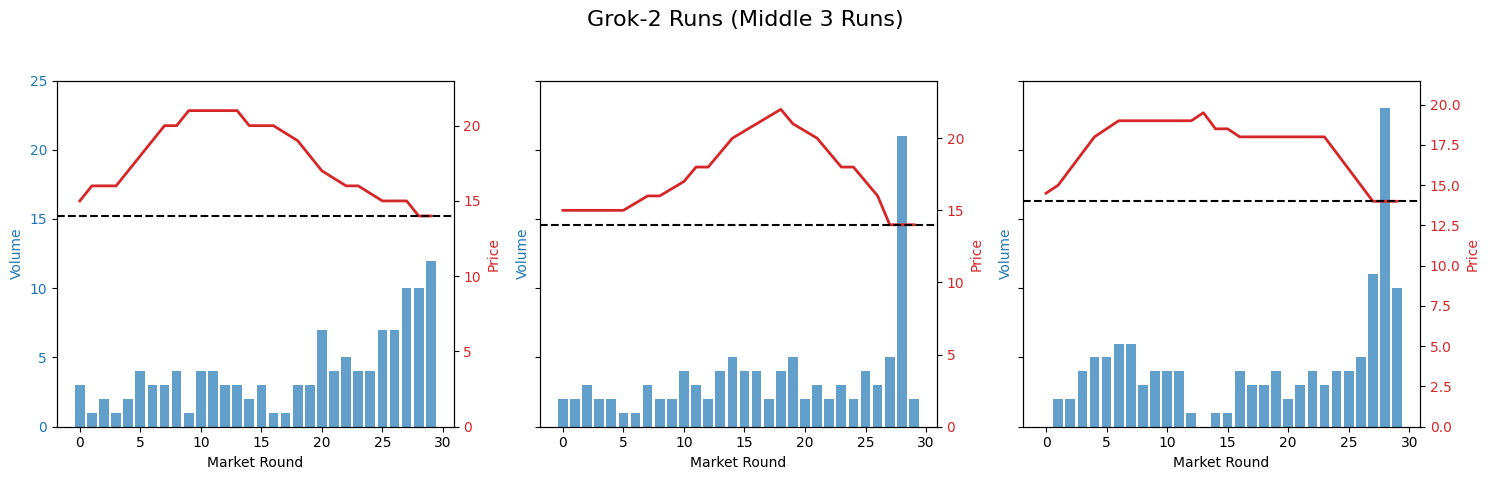

In [10]:
# Plot grok-2 runs
plot_multiple_runs([25, 26, 27], title="Grok-2 Runs (Middle 3 Runs)")

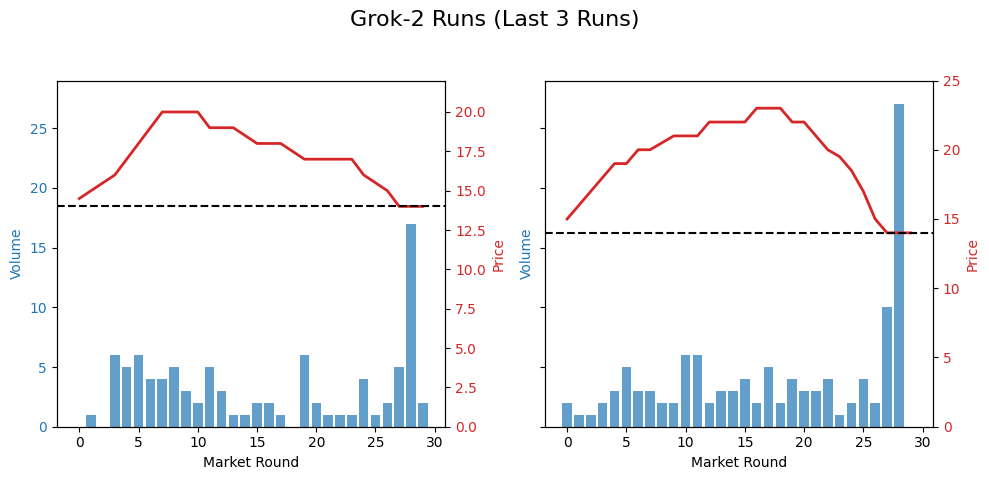

In [13]:
# Plot grok-2 runs
plot_multiple_runs([30, 31], title="Grok-2 Runs (Last 3 Runs)")

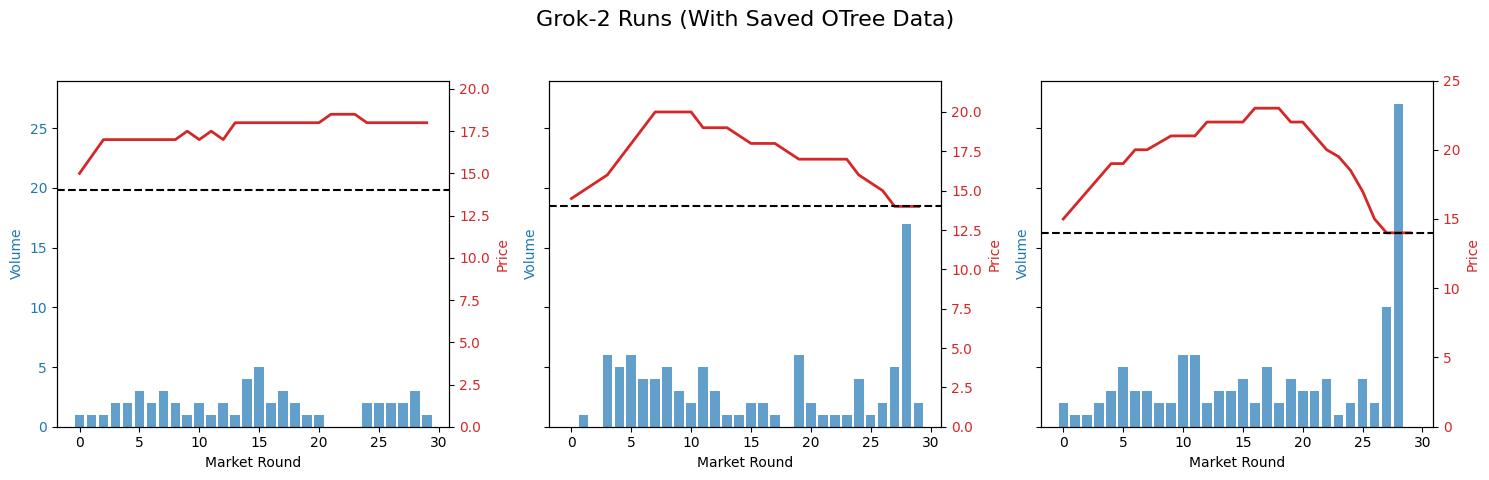

In [18]:
# Plot grok-2 runs
plot_multiple_runs([14, 30, 31], title="Grok-2 Runs (With Saved OTree Data)")

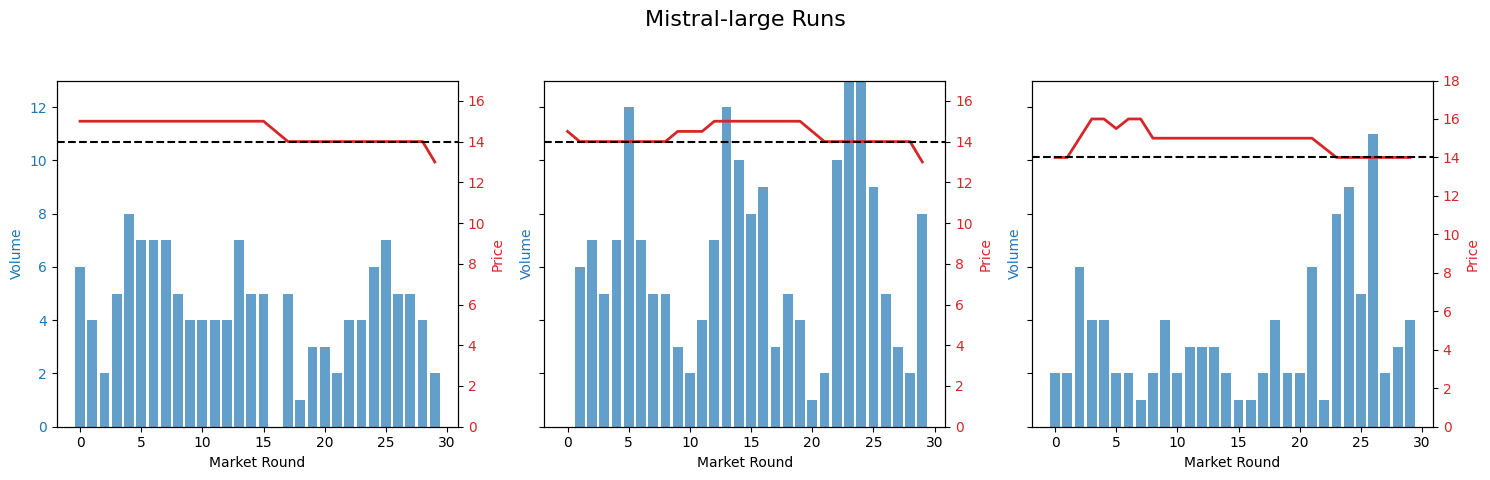

In [103]:
# Plot mistral-large runs
plot_multiple_runs([20, 21, 22], title="Mistral-large Runs")

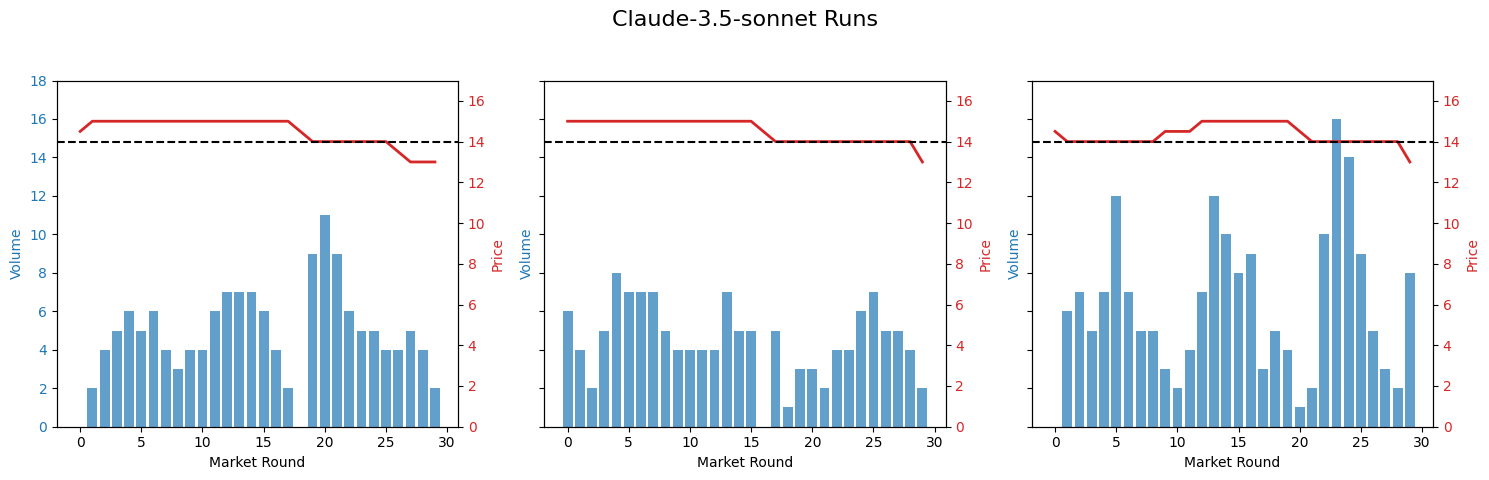

In [104]:
# Plot claude-3.5-sonnet runs
plot_multiple_runs([19, 20, 21], title="Claude-3.5-sonnet Runs")

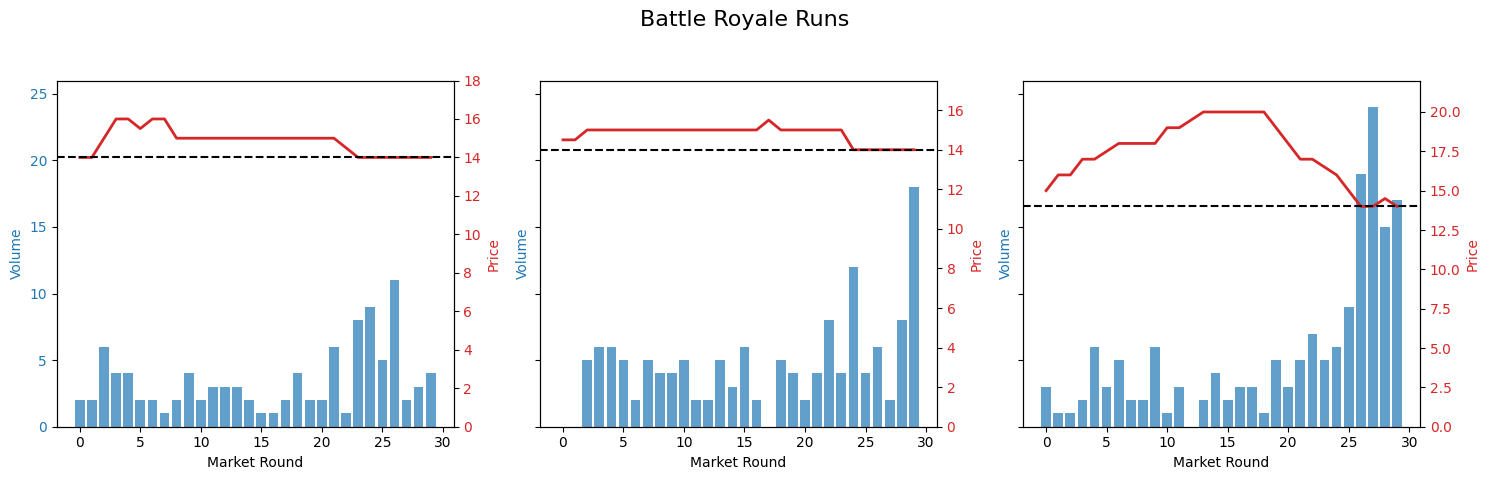

In [105]:
# Plot battle-royale runs
plot_multiple_runs([22, 23, 24], title="Battle Royale Runs")